# Plotting Figure 9
This script is to reproduce Figure 9 from the paper.  
Please be aware that you first need to run the script **inference_full** in order to have all the results necessary.

## Checking GPU Availability
First, let's see if we have a GPU available. It is highly recommended to utilize a GPU, although it is also possible to run this experiment on the CPU at a much slower rate.

In [1]:
import matplotlib.pyplot as plt

from experiment import *
from experiment_config import *
from loss_utils import getMSELossValues, getMSELoss
from data_utils import get_result_path, load_results

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using " + str(device) + " for evaluation...")


C:\Users\galiger.gergo\Desktop\ThermUNet-master\experiment.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  assert mean is not -1 and std is not -1, 'Normalize transform not detected!'
C:\Users\galiger.gergo\Desktop\ThermUNet-master\experiment.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  assert mean is not -1 and std is not -1, 'Normalize transform not detected!'


using cuda for evaluation...


## Defining Locations of Ground Truth Masks and Results

In [2]:
mask_dir = os.path.join(os.getcwd(), 'data', 'masks', 'test')
hybrid_input_path_admm = os.path.join(os.getcwd(), 'data', 'hybrid', 'admm')
hybrid_input_path_admm_curvelet = os.path.join(os.getcwd(), 'data', 'hybrid', 'admm_curvelet')
hybrid_input_path_fistanet = os.path.join(os.getcwd(), 'data', 'hybrid', 'fistanet')
e2e_input_path = os.path.join(os.getcwd(), 'data', 'end2end', 'test')

Notice, we just take the results from a single model for each approach, since we previously showed that the variance of several runs is negligible.

In [3]:
# lrg_hybrid_model_file = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'lrg', '80k',
#                                      '2020-4-25_15-5-29.503889', 'models', 'best_model.pth')
# lrg_hybrid_results_path_admm = get_result_path(lrg_hybrid_model_file, hybrid_input_path_admm)
# lrg_hybrid_results_admm = load_results(lrg_hybrid_results_path_admm, mask_dir, getHybridPrefixes())
# lrg_hybrid_results_path_admm_curvelet = get_result_path(lrg_hybrid_model_file, hybrid_input_path_admm_curvelet)
# lrg_hybrid_results_admm_curvelet = load_results(lrg_hybrid_results_path_admm_curvelet, mask_dir, getHybridPrefixes())
# lrg_hybrid_results_path_fistanet = get_result_path(lrg_hybrid_model_file, hybrid_input_path_fistanet)
# lrg_hybrid_results_fistanet = load_results(lrg_hybrid_results_path_fistanet, mask_dir, getHybridPrefixes())

cmp_hybrid_model_file_only_square_admm = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'cmp', '80k',
                                     'only_square_admm', '2020-4-25_13-32-31.889297', 'models', 'best_model.pth')
cmp_hybrid_results_path_admm_only_square_admm = get_result_path(cmp_hybrid_model_file_only_square_admm, hybrid_input_path_admm)
cmp_hybrid_results_admm_only_square_admm = load_results(cmp_hybrid_results_path_admm_only_square_admm, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_admm_curvelet_only_square_admm = get_result_path(cmp_hybrid_model_file_only_square_admm, hybrid_input_path_admm_curvelet)
cmp_hybrid_results_admm_curvelet_only_square_admm = load_results(cmp_hybrid_results_path_admm_curvelet_only_square_admm, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_fistanet_only_square_admm = get_result_path(cmp_hybrid_model_file_only_square_admm, hybrid_input_path_fistanet)
cmp_hybrid_results_fistanet_only_square_admm = load_results(cmp_hybrid_results_path_fistanet_only_square_admm, mask_dir, getHybridPrefixes())

cmp_hybrid_model_file_more_shapes_admm = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'cmp', '80k',
                                     'more_shapes_admm', '2022-12-23_23-22-19.858192', 'models', 'best_model.pth')
cmp_hybrid_results_path_admm_more_shapes_admm = get_result_path(cmp_hybrid_model_file_more_shapes_admm, hybrid_input_path_admm)
cmp_hybrid_results_admm_more_shapes_admm = load_results(cmp_hybrid_results_path_admm_more_shapes_admm, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_admm_curvelet_more_shapes_admm = get_result_path(cmp_hybrid_model_file_more_shapes_admm, hybrid_input_path_admm_curvelet)
cmp_hybrid_results_admm_curvelet_more_shapes_admm = load_results(cmp_hybrid_results_path_admm_curvelet_more_shapes_admm, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_fistanet_more_shapes_admm = get_result_path(cmp_hybrid_model_file_more_shapes_admm, hybrid_input_path_fistanet)
cmp_hybrid_results_fistanet_more_shapes_admm = load_results(cmp_hybrid_results_path_fistanet_more_shapes_admm, mask_dir, getHybridPrefixes())

cmp_hybrid_model_file_more_shapes_fistanet = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'cmp', '80k',
                                     'more_shapes_fistanet', '2022-12-23_8-15-47.801755', 'models', 'best_model.pth')
cmp_hybrid_results_path_admm_more_shapes_fistanet = get_result_path(cmp_hybrid_model_file_more_shapes_fistanet, hybrid_input_path_admm)
cmp_hybrid_results_admm_more_shapes_fistanet = load_results(cmp_hybrid_results_path_admm_more_shapes_fistanet, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_admm_curvelet_more_shapes_fistanet = get_result_path(cmp_hybrid_model_file_more_shapes_fistanet, hybrid_input_path_admm_curvelet)
cmp_hybrid_results_admm_curvelet_more_shapes_fistanet = load_results(cmp_hybrid_results_path_admm_curvelet_more_shapes_fistanet, mask_dir, getHybridPrefixes())
cmp_hybrid_results_path_fistanet_more_shapes_fistanet = get_result_path(cmp_hybrid_model_file_more_shapes_fistanet, hybrid_input_path_fistanet)
cmp_hybrid_results_fistanet_more_shapes_fistanet = load_results(cmp_hybrid_results_path_fistanet_more_shapes_fistanet, mask_dir, getHybridPrefixes())



#lrg_e2e_model_file = os.path.join(os.getcwd(), 'data', 'end2end', 'models', 'lrg', '80k',
#                                     '2020-4-17_13-0-34.508471', 'models', 'best_model.pth')
#lrg_e2e_results_path = get_result_path(lrg_e2e_model_file, e2e_input_path)
#lrg_e2e_results = load_results(lrg_e2e_results_path, mask_dir, getE2EPrefixes())
#
#cmp_e2e_model_file = os.path.join(os.getcwd(), 'data', 'end2end', 'models', 'cmp', '80k',
#                                     '2020-4-17_13-17-24.661566', 'models', 'best_model.pth')
#cmp_e2e_results_path = get_result_path(cmp_e2e_model_file, e2e_input_path)
#cmp_e2e_results = load_results(cmp_e2e_results_path, mask_dir, getE2EPrefixes())

## Defining Locations of Baseline Results

In [4]:
fkmig_results_path_admm = os.path.join(os.getcwd(), 'data', 'baselines', 'admm')
fkmig_results_admm = load_results(fkmig_results_path_admm, mask_dir, getFKMIGPrefixes())
fkmig_results_path_admm_curvelet = os.path.join(os.getcwd(), 'data', 'baselines', 'admm_curvelet')
fkmig_results_admm_curvelet = load_results(fkmig_results_path_admm_curvelet, mask_dir, getFKMIGPrefixes())
fkmig_results_path_fistanet = os.path.join(os.getcwd(), 'data', 'baselines', 'fistanet')
fkmig_results_fistanet = load_results(fkmig_results_path_fistanet, mask_dir, getFKMIGPrefixes())

## Loading and Computing MSE

In [24]:
snr_list = ["SNR_70", "SNR_60", "SNR_50", "SNR_40", "SNR_30", "SNR_20", "SNR_10", "SNR_0", "SNR_-10", "SNR_-20"]
snr_list.reverse()

results_template = np.zeros((len(snr_list),1))

all_unet_mse_results_admm = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_only_square_admm = np.zeros((results_template.shape))
all_unet_mse_results_admm_curvelet = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_curvelet_only_square_admm = np.zeros((results_template.shape))
all_unet_mse_results_fistanet = np.zeros((results_template.shape))
all_small_unet_mse_results_fistanet_only_square_admm = np.zeros((results_template.shape))
#all_e2e_unet_mse_results = np.zeros((results_template.shape))
#all_e2e_small_unet_mse_results = np.zeros((results_template.shape))
all_fkmig_mse_results_admm = np.zeros((results_template.shape))
all_fkmig_mse_results_fistanet = np.zeros((results_template.shape))
all_fkmig_mse_results_admm_curvelet = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_more_shapes_fistanet = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_curvelet_more_shapes_fistanet = np.zeros((results_template.shape))
all_small_unet_mse_results_fistanet_more_shapes_fistanet = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_more_shapes_admm = np.zeros((results_template.shape))
all_small_unet_mse_results_admm_curvelet_more_shapes_admm = np.zeros((results_template.shape))
all_small_unet_mse_results_fistanet_more_shapes_admm = np.zeros((results_template.shape))


results_template_values = np.zeros((len(snr_list),len(cmp_hybrid_results_admm_only_square_admm[snr_list[0]])))

all_unet_mse_results_admm_values = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_values_only_square_admm = np.zeros((results_template_values.shape))
all_unet_mse_results_admm_curvelet_values = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_curvelet_values_only_square_admm = np.zeros((results_template_values.shape))
all_unet_mse_results_fistanet_values = np.zeros((results_template_values.shape))
all_small_unet_mse_results_fistanet_values_only_square_admm = np.zeros((results_template_values.shape))
#all_e2e_unet_mse_results = np.zeros((results_template.shape))
#all_e2e_small_unet_mse_results = np.zeros((results_template.shape))
all_fkmig_mse_results_admm_values = np.zeros((results_template_values.shape))
all_fkmig_mse_results_admm_curvelet_values = np.zeros((results_template_values.shape))
all_fkmig_mse_results_fistanet_values = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_values_more_shapes_fistanet = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_curvelet_values_more_shapes_fistanet = np.zeros((results_template_values.shape))
all_small_unet_mse_results_fistanet_values_more_shapes_fistanet = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_values_more_shapes_admm = np.zeros((results_template_values.shape))
all_small_unet_mse_results_admm_curvelet_values_more_shapes_admm = np.zeros((results_template_values.shape))
all_small_unet_mse_results_fistanet_values_more_shapes_admm = np.zeros((results_template_values.shape))

In [25]:
i=0
for snr in snr_list:
#     print("loading lrg_hybrid_results_admm: " + str(snr))
#     dataset = lrg_hybrid_results_admm[snr]    
#     data_loader = get_dataloader(dataset)
#     all_unet_mse_results_admm[i] = getMSELoss(data_loader)
#     all_unet_mse_results_admm_values[i] = getMSELossValues(data_loader)
#     print('MSE: {}'.format(np.mean(all_unet_mse_results_admm[i])))
    
#     print("loading lrg_hybrid_results_admm_curvelet: " + str(snr))
#     dataset = lrg_hybrid_results_admm_curvelet[snr]    
#     data_loader = get_dataloader(dataset)
#     all_unet_mse_results_admm_curvelet[i] = getMSELoss(data_loader)
#     all_unet_mse_results_admm_curvelet_values[i] = getMSELossValues(data_loader)
#     print('MSE: {}'.format(np.mean(all_unet_mse_results_admm_curvelet[i])))
    
#     print("loading lrg_hybrid_results_fistanet: " + str(snr))
#     dataset = lrg_hybrid_results_fistanet[snr]    
#     data_loader = get_dataloader(dataset)
#     all_unet_mse_results_fistanet[i] = getMSELoss(data_loader)
#     all_unet_mse_results_fistanet_values[i] = getMSELossValues(data_loader)
#     print('MSE: {}'.format(np.mean(all_unet_mse_results_fistanet[i])))

    # print("loading lrg_e2e_results: " + str(snr))
    # dataset = lrg_e2e_results[snr]    
    # data_loader = get_dataloader(dataset)
    # all_e2e_unet_mse_results[i] = getMSELoss(data_loader)
    # print('MSE: {}'.format(np.mean(all_e2e_unet_mse_results[i])))  
    
    print("loading cmp_hybrid_results_admm_only_square_admm: " + str(snr))
    dataset = cmp_hybrid_results_admm_only_square_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_only_square_admm[i] = getMSELoss(data_loader)
    all_small_unet_mse_results_admm_values_only_square_admm[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_only_square_admm[i])))
    
    print("loading cmp_hybrid_results_admm_curvelet_only_square_admm: " + str(snr))
    dataset = cmp_hybrid_results_admm_curvelet_only_square_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_curvelet_only_square_admm[i] = getMSELoss(data_loader)
    all_small_unet_mse_results_admm_curvelet_values_only_square_admm[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_curvelet_only_square_admm[i])))
    
    print("loading cmp_hybrid_results_fistanet_only_square_admm: " + str(snr))
    dataset = cmp_hybrid_results_fistanet_only_square_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_fistanet_only_square_admm[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_fistanet_values_only_square_admm[i] = getMSELossValues(data_loader, 'unet')
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_fistanet_only_square_admm[i])))
    
    print("loading cmp_hybrid_results_admm_more_shapes_admm: " + str(snr))
    dataset = cmp_hybrid_results_admm_more_shapes_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_more_shapes_admm[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_admm_values_more_shapes_admm[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_more_shapes_admm[i])))
    
    print("loading cmp_hybrid_results_admm_curvelet_more_shapes_admm: " + str(snr))
    dataset = cmp_hybrid_results_admm_curvelet_more_shapes_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_curvelet_more_shapes_admm[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_admm_curvelet_values_more_shapes_admm[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_curvelet_more_shapes_admm[i])))
    
    print("loading cmp_hybrid_results_fistanet_more_shapes_admm: " + str(snr))
    dataset = cmp_hybrid_results_fistanet_more_shapes_admm[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_fistanet_more_shapes_admm[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_fistanet_values_more_shapes_admm[i] = getMSELossValues(data_loader, 'unet')
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_fistanet_more_shapes_admm[i])))
    
    print("loading cmp_hybrid_results_admm_more_shapes_fistanet: " + str(snr))
    dataset = cmp_hybrid_results_admm_more_shapes_fistanet[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_more_shapes_fistanet[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_admm_values_more_shapes_fistanet[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_more_shapes_fistanet[i])))
    
    print("loading cmp_hybrid_results_admm_curvelet_more_shapes_fistanet: " + str(snr))
    dataset = cmp_hybrid_results_admm_curvelet_more_shapes_fistanet[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_admm_curvelet_more_shapes_fistanet[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_admm_curvelet_values_more_shapes_fistanet[i] = getMSELossValues(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_admm_curvelet_more_shapes_fistanet[i])))
    
    print("loading cmp_hybrid_results_fistanet_more_shapes_fistanet: " + str(snr))
    dataset = cmp_hybrid_results_fistanet_more_shapes_fistanet[snr]
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results_fistanet_more_shapes_fistanet[i] = getMSELoss(data_loader)
    # all_small_unet_mse_results_fistanet_values_more_shapes_fistanet[i] = getMSELossValues(data_loader, 'unet')
    # print(np.sum(all_small_unet_mse_results_fistanet_values_more_shapes_fistanet[i]) / len(all_small_unet_mse_results_fistanet_values_more_shapes_fistanet[i]))
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results_fistanet_more_shapes_fistanet[i])))

    #print("loading cmp_e2e_results: " + str(snr))
    #dataset = cmp_e2e_results[snr]    
    #data_loader = get_dataloader(dataset)
    #all_e2e_small_unet_mse_results[i] = getMSELoss(data_loader)
    #print('MSE: {}'.format(np.mean(all_e2e_small_unet_mse_results[i])))  

#     print("loading fkmig_results_admm: " + str(snr))
#     dataset = fkmig_results_admm[snr]
#     data_loader = get_dataloader(dataset)
#     all_fkmig_mse_results_admm[i] = getMSELoss(data_loader)
#     all_fkmig_mse_results_admm_values[i] = getMSELossValues(data_loader, 'fkmig')
#     print(np.sum(all_fkmig_mse_results_admm_values[i]) / len(all_fkmig_mse_results_admm_values[i]))
#     print('MSE: {}'.format(np.mean(all_fkmig_mse_results_admm[i])))
    
#     print("loading fkmig_results_admm_curvelet: " + str(snr))
#     dataset = fkmig_results_admm_curvelet[snr]
#     data_loader = get_dataloader(dataset)
#     all_fkmig_mse_results_admm_curvelet[i] = getMSELoss(data_loader)
#     all_fkmig_mse_results_admm_curvelet_values[i] = getMSELossValues(data_loader, 'fkmig')
#     print(np.sum(all_fkmig_mse_results_admm_curvelet_values[i]) / len(all_fkmig_mse_results_admm_curvelet_values[i]))
#     print('MSE: {}'.format(np.mean(all_fkmig_mse_results_admm_curvelet[i])))

#     print("loading fkmig_results_fistanet: " + str(snr))
#     dataset = fkmig_results_fistanet[snr]
#     data_loader = get_dataloader(dataset)
#     all_fkmig_mse_results_fistanet[i] = getMSELoss(data_loader)
#     all_fkmig_mse_results_fistanet_values[i] = getMSELossValues(data_loader)
#     print('MSE: {}'.format(np.mean(all_fkmig_mse_results_fistanet[i])))  

    i+=1

loading cmp_hybrid_results_admm_only_square_admm: SNR_-20
MSE: 0.009287504912354052
loading cmp_hybrid_results_admm_curvelet_only_square_admm: SNR_-20
MSE: 0.10179714851081371
loading cmp_hybrid_results_fistanet_only_square_admm: SNR_-20
MSE: 0.009110866021364928
loading cmp_hybrid_results_admm_more_shapes_admm: SNR_-20
MSE: 0.005317169486079365
loading cmp_hybrid_results_admm_curvelet_more_shapes_admm: SNR_-20
MSE: 0.009151615155860781
loading cmp_hybrid_results_fistanet_more_shapes_admm: SNR_-20
MSE: 0.007486219573765993
loading cmp_hybrid_results_admm_more_shapes_fistanet: SNR_-20
MSE: 0.008893981636501848
loading cmp_hybrid_results_admm_curvelet_more_shapes_fistanet: SNR_-20
MSE: 0.01184041685424745
loading cmp_hybrid_results_fistanet_more_shapes_fistanet: SNR_-20
MSE: 0.005054217393044382
loading cmp_hybrid_results_admm_only_square_admm: SNR_-10
MSE: 0.010046334052458406
loading cmp_hybrid_results_admm_curvelet_only_square_admm: SNR_-10
MSE: 0.043547993525862694
loading cmp_hybrid

In [ ]:
#from scipy.io import loadmat

#fkmig_MSE_path = 'C:/Users/galiger.gergo/Desktop/ThermDataGen/FistaNet/data/NDTData/MSE_per_SNR_fkmig_ADMM_FISTA-Net_test.mat'

#mat_file = loadmat(fkmig_MSE_path)
#fkmig_MSEs = np.array(mat_file['fkmig_MSEs'])

#all_fkmig_mse_results_admm = np.transpose([[x/(1000*255) for x in fkmig_MSEs[0]]])
#all_fkmig_mse_results_fistanet = np.transpose([[x/(1000*255) for x in fkmig_MSEs[1]]])

## Plotting

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([all_fkmig_mse_results_admm_values[0], all_small_unet_mse_results_fistanet_values[0]])
plt.title('ADMM fkmig | SNR -20                             FISTA-Net hybrid cmp | SNR -20')

# show plot
plt.show()

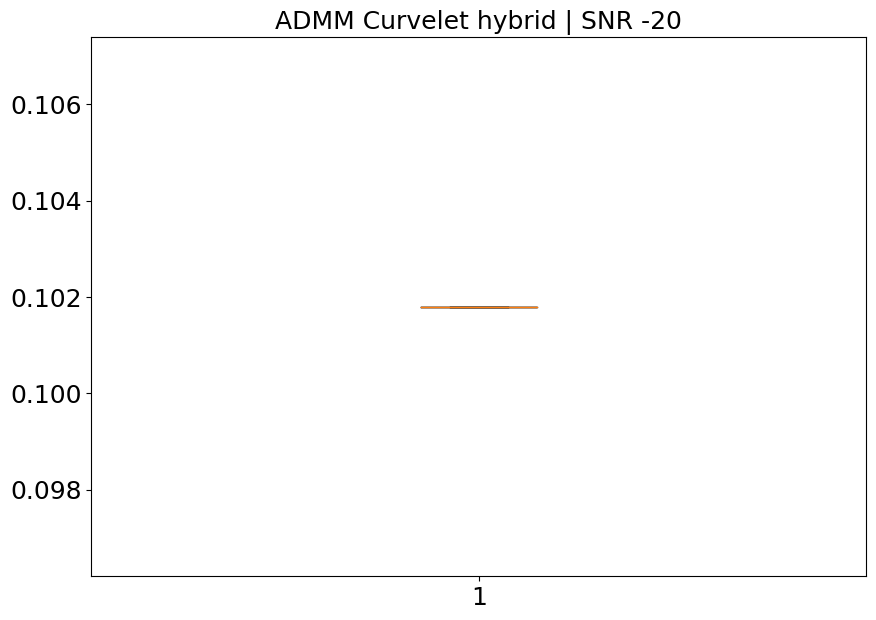

In [47]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(all_small_unet_mse_results_admm_curvelet[0])
plt.title('ADMM Curvelet hybrid | SNR -20')

# show plot
plt.show()

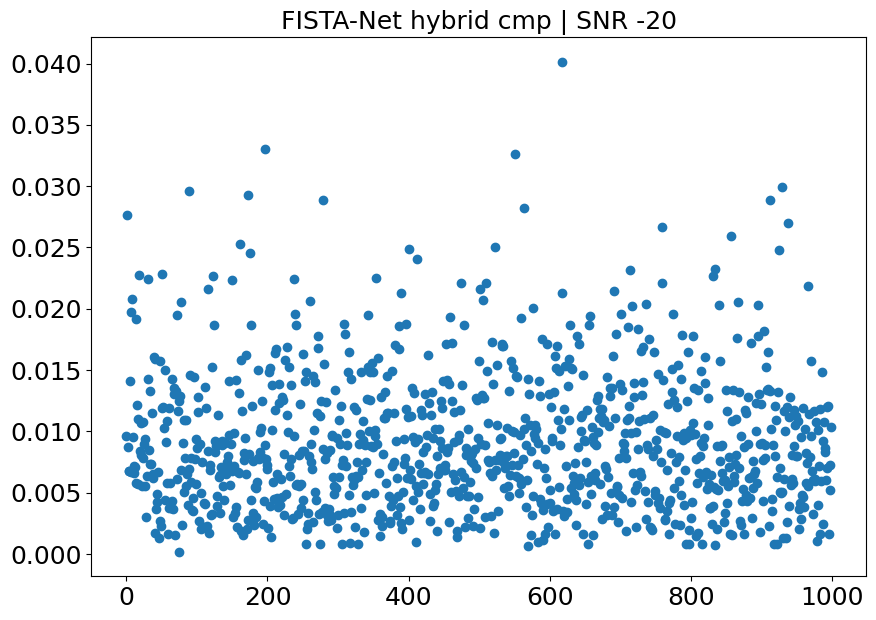

In [48]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.plot(all_small_unet_mse_results_fistanet_values[0], 'o')
plt.title('FISTA-Net hybrid cmp | SNR -20')

# show plot
plt.show()

1537867
267793


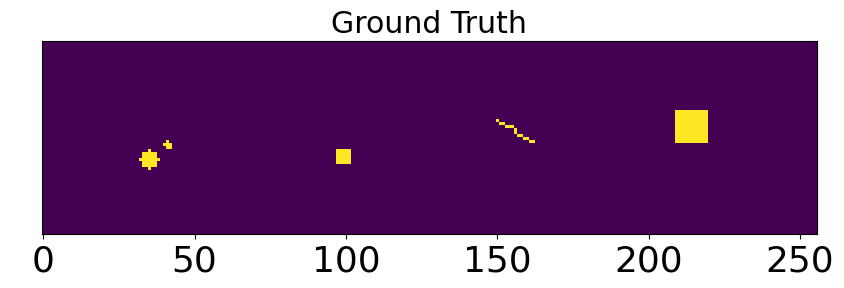

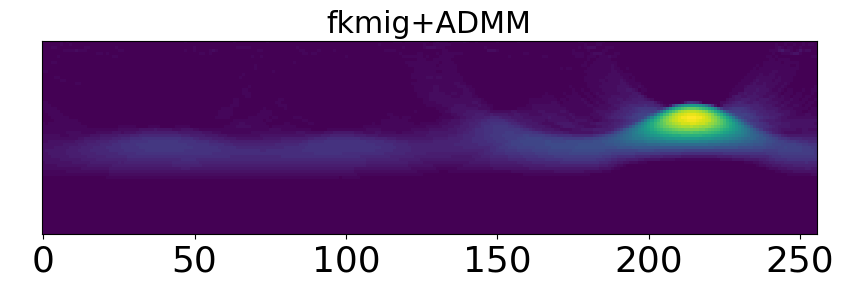

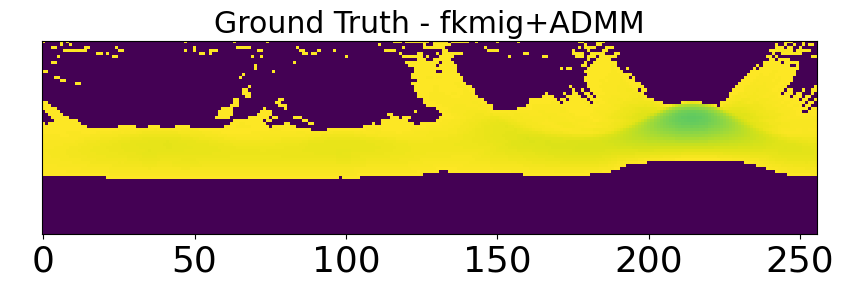

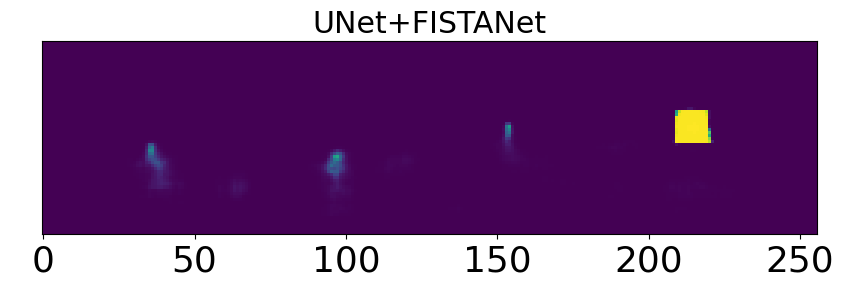

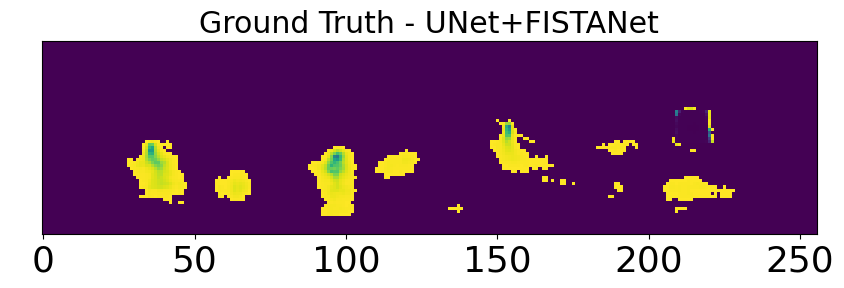

In [464]:
unet_fistanet = io.imread('./data/hybrid/models/cmp/80k/more_shapes_admm/2022-12-23_23-22-19.858192/models/best_model/C/Users/galiger.gergo/Desktop/ThermUNet-master/data/hybrid/fistanet/SNR_10/T_virt_abel_10.png')
fkmig_admm = io.imread('./data/baselines/admm/SNR_10/fkmig_10.png')
ground_truth = io.imread('./data/masks/test/V_true_10.png')

fig = plt.figure(figsize =(10, 7))
plt.imshow(ground_truth)
plt.title('Ground Truth')

fig = plt.figure(figsize =(10, 7))
plt.imshow(fkmig_admm)
plt.title('fkmig+ADMM')

fig = plt.figure(figsize =(10, 7))
plt.imshow(ground_truth - fkmig_admm)
plt.title('Ground Truth - fkmig+ADMM')
print(np.sum(ground_truth - fkmig_admm))

fig = plt.figure(figsize =(10, 7))
plt.title('UNet+FISTANet')
plt.imshow(unet_fistanet)

fig = plt.figure(figsize =(10, 7))
plt.imshow(ground_truth - unet_fistanet)
plt.title('Ground Truth - UNet+FISTANet')
print(np.sum(ground_truth - unet_fistanet))


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

snr_val_list = ["70", "60", "50", "40", "30", "20", "10", "0", "-10", "-20"]
snr_val_list.reverse()

SMALL_SIZE = 18
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('legend', ncol=2)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
params = {'legend.fontsize': SMALL_SIZE,
          'legend.handlelength': 1}
plt.rcParams.update(params)

frame = np.transpose(np.concatenate(([all_fkmig_mse_results_admm],[all_fkmig_mse_results_fistanet], [all_small_unet_mse_results_admm], [all_unet_mse_results_admm], [all_small_unet_mse_results_fistanet], [all_unet_mse_results_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,6)), columns=['ADMM fkmig', 'FISTA-Net fkmig', 'ADMM hybrid cmp', 'ADMM hybrid lrg', 'FISTA-Net hybrid cmp', 'FISTA-Net hybrid lrg'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['rs--','bs--','ro--','r^-','bo--','b^-'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.000, 0.015))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("fkmig_vs_all_vs_SNR.png", dpi=fig.dpi)

NameError: name 'all_small_unet_mse_results_admm' is not defined

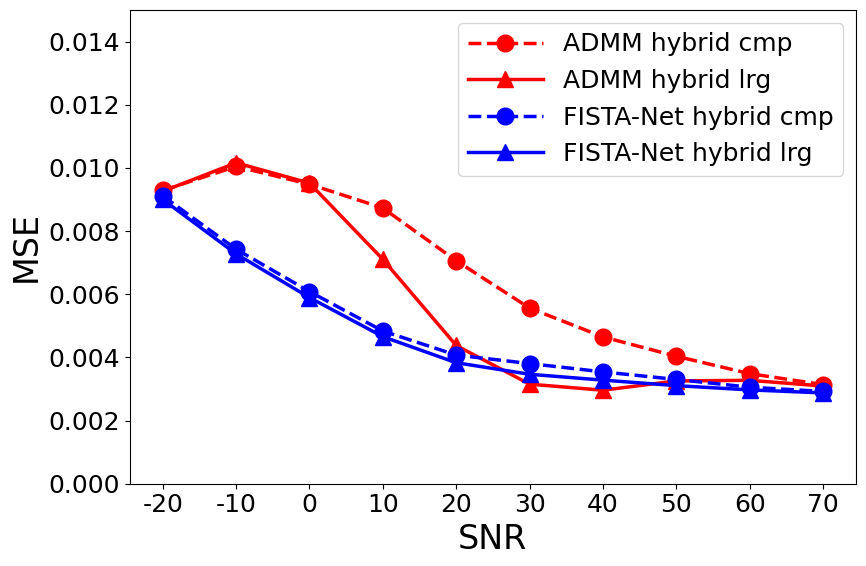

In [51]:
frame = np.transpose(np.concatenate(([all_small_unet_mse_results_admm], [all_unet_mse_results_admm], [all_small_unet_mse_results_fistanet], [all_unet_mse_results_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,4)), columns=['ADMM hybrid cmp', 'ADMM hybrid lrg', 'FISTA-Net hybrid cmp', 'FISTA-Net hybrid lrg'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['ro--','r^-','bo--','b^-'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.000, 0.015))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("fkmig_vs_all_vs_SNR.png", dpi=fig.dpi)

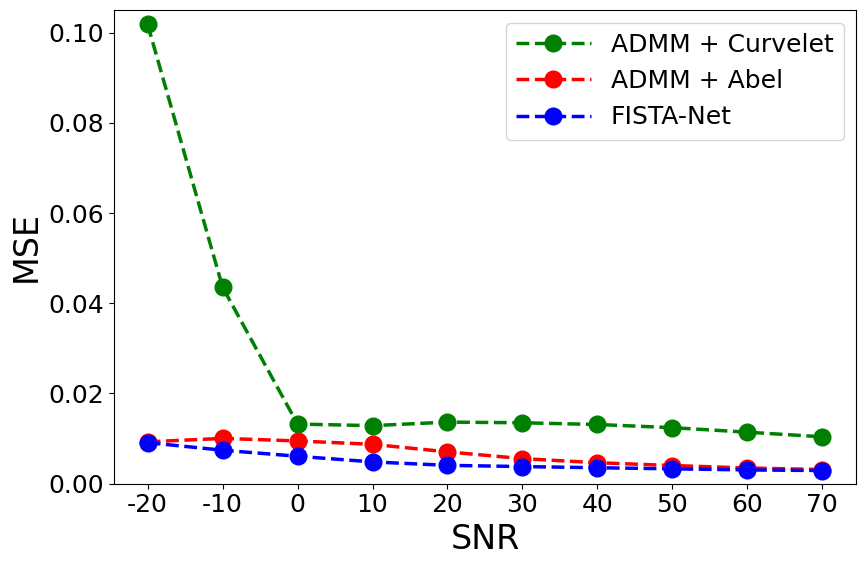

In [70]:
frame = np.transpose(np.concatenate(([all_small_unet_mse_results_admm_curvelet], [all_small_unet_mse_results_admm], [all_small_unet_mse_results_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,3)), columns=['ADMM + Curvelet', 'ADMM + Abel', 'FISTA-Net'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['go--','ro--','bo--'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.000,0.105))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("RECONSTR_MSE_per_SNR_testdata_hybrid-cmp-onlysquare_fistanet-epoch-31", dpi=fig.dpi)

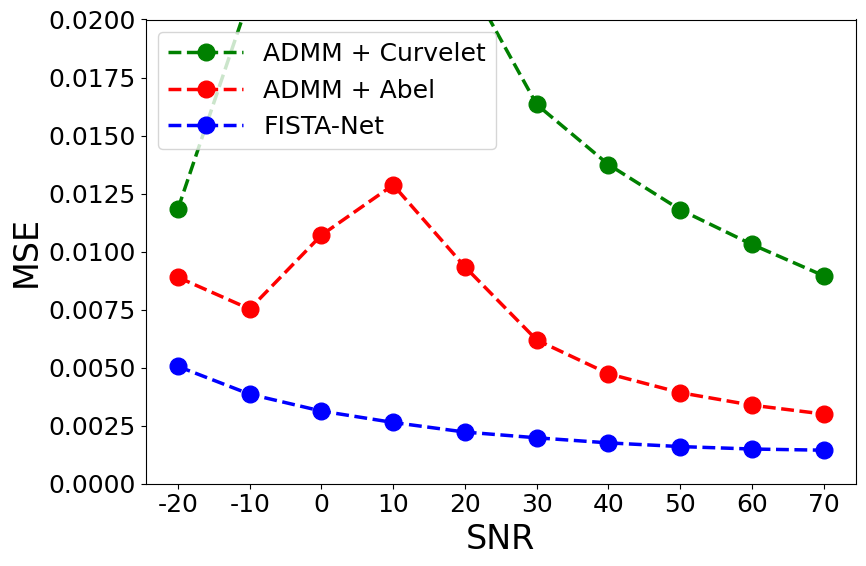

In [29]:
frame = np.transpose(np.concatenate(([all_small_unet_mse_results_admm_curvelet_more_shapes_fistanet], [all_small_unet_mse_results_admm_more_shapes_fistanet], [all_small_unet_mse_results_fistanet_more_shapes_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,3)), columns=['ADMM + Curvelet', 'ADMM + Abel', 'FISTA-Net'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['go--','ro--','bo--'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.00,0.02))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("RECONSTR_MSE_per_SNR_testdata_hybrid-cmp-moreshapes_fistanet-epoch-31_zoom", dpi=fig.dpi)

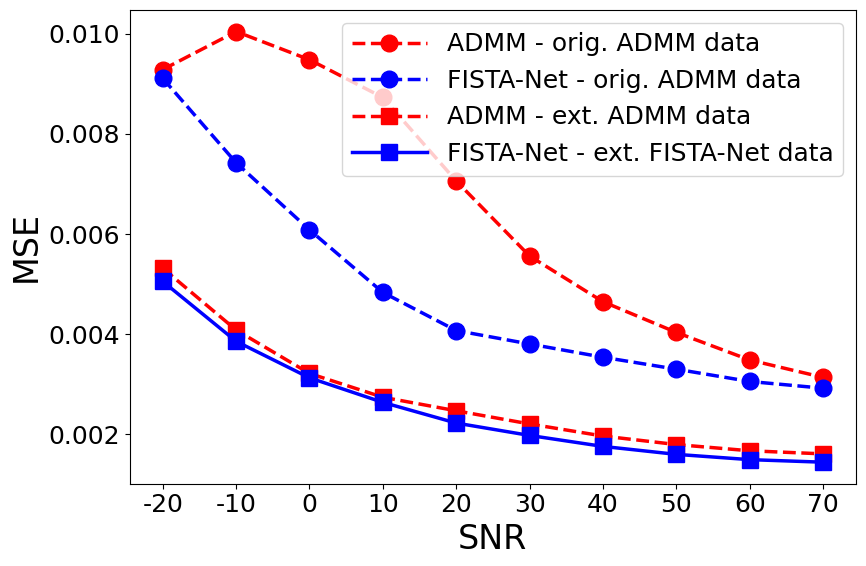

In [40]:
frame = np.transpose(np.concatenate(([all_small_unet_mse_results_admm_only_square_admm], [all_small_unet_mse_results_fistanet_only_square_admm], [all_small_unet_mse_results_admm_more_shapes_admm], [all_small_unet_mse_results_fistanet_more_shapes_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,4)), columns=['ADMM - orig. ADMM data', 'FISTA-Net - orig. ADMM data', 'ADMM - ext. ADMM data', 'FISTA-Net - ext. FISTA-Net data'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['ro--','bo--','rs--','bs-'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
# plt.ylim((0.00,0.02))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("RECONSTR_MSE_per_SNR_testdata_hybrid-cmp-moreshapes-epoch-31_zoom", dpi=fig.dpi)

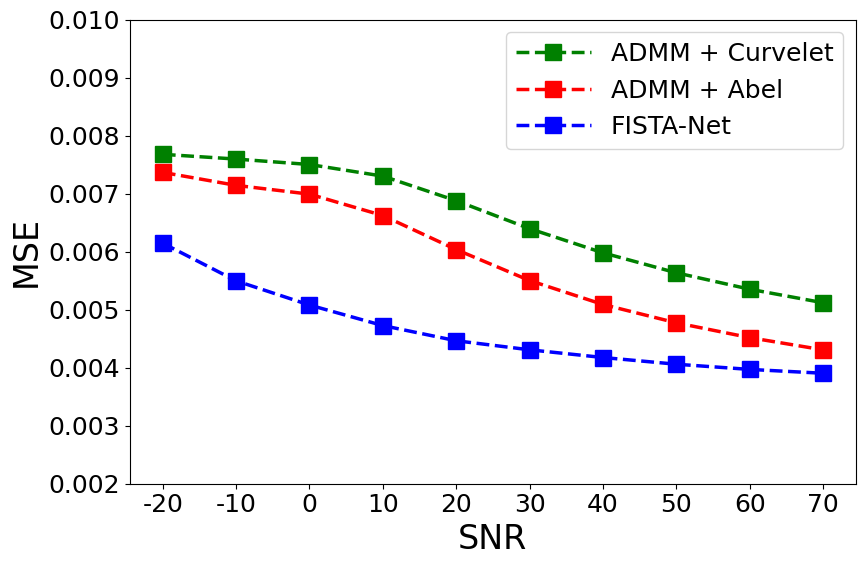

In [65]:
frame = np.transpose(np.concatenate(([all_fkmig_mse_results_admm_curvelet],[all_fkmig_mse_results_admm],[all_fkmig_mse_results_fistanet]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,3)), columns=['ADMM + Curvelet', 'ADMM + Abel', 'FISTA-Net'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['gs--','rs--','bs--'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)


def format_fn(tick_val, tick_pos):
    if int(tick_val) in all_results.index:
        return snr_val_list[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.002, 0.010))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=1)

plt.plot()
plt.tight_layout()
plt.savefig("RECONSTR_MSE_per_SNR_testdata_fkmig_fistanet-epoch-31", dpi=fig.dpi)

In [172]:
from skimage import io
import matplotlib.pylab as pylab

In [398]:
def plot_comp_datagen(mask_dir_files, names, samples, file_name):
    col_no = len(mask_dir_files)
    row_no = len(samples[0])
    
    fig, axs = plt.subplots(row_no, col_no, layout="tight")
    params = {'ytick.labelcolor': 'white',
          'ytick.color': 'white'}
    pylab.rcParams.update(params)
    px = 1/plt.rcParams['figure.dpi']
    fig.set_figheight(600*px)
    fig.set_figwidth(1000*px)
    
    for i in range(row_no):
        for j in range(col_no):
            path =  mask_dir_files[j] + '_' + str(samples[j][i]) + '.png'
            image = io.imread(path)
            axs[i, j].imshow(image)
            
            axs[i, j].get_xaxis().set_visible(False)
            axs[i, j].get_yaxis().set_visible(False)
            if not i:
                axs[i, j].set_title(names[j], size='large', y=1.0, pad=20)            
            
    plt.savefig(file_name)
    plt.show()
    plt.clf()
    plt.close()

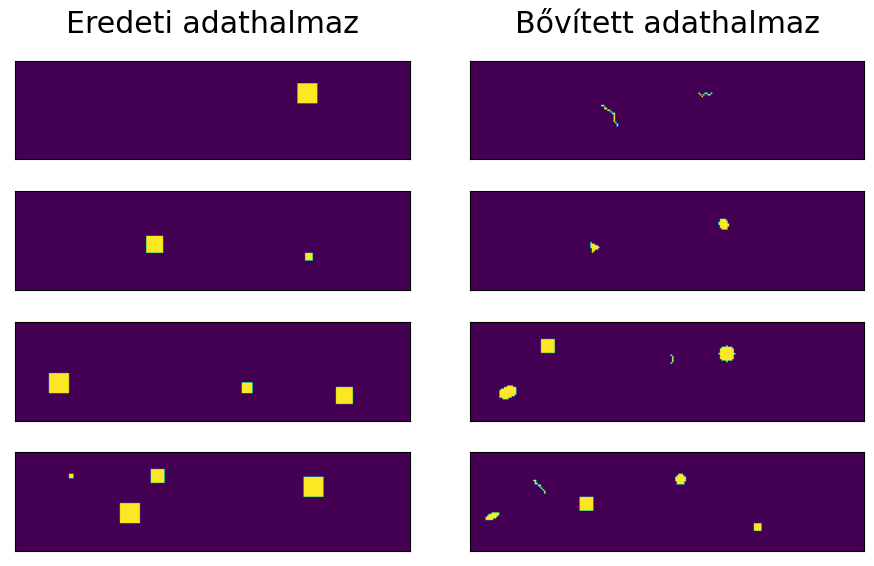

In [399]:
mask_path_file = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\masks\\test\\V_true'
mask_path_files = [mask_path_file, mask_path_file]
save_name = './plots/datagen_comp_4.png'
names = ['Eredeti adathalmaz', 'Bővített adathalmaz']
samples = [
    [15, 5, 51, 648],
    [242, 284, 549, 199]
]
plot_comp_datagen(mask_path_files, names, samples, save_name)

In [426]:
def plot_comp_small(dirs, files, names, samples, snr, file_name):
    col_no = len(samples)
    row_no = len(dirs)
    
    fig, axs = plt.subplots(row_no, col_no, layout="tight")
    params = {'ytick.labelcolor': 'white',
          'ytick.color': 'white'}
    pylab.rcParams.update(params)
    px = 1/plt.rcParams['figure.dpi']
    fig.set_figheight(500*px)
    fig.set_figwidth(900*px)
    
    for i in range(row_no):
        for j in range(col_no):
            if dirs[i].split('\\')[-1] in ['groundtruths', 'groundtruths_abel_space', 'test']:
                path =  dirs[i] + '/' + files[i] + '_' + str(samples[j]) + '.png'
            else:
                path = dirs[i] + '/SNR_' + str(snr) + '/' + files[i] + '_' + str(samples[j]) + '.png'
            image = io.imread(path)
            axs[i, j].imshow(image)
            
            axs[i, j].get_xaxis().set_visible(False)
            axs[i, j].get_yaxis().set_visible(False)
            axs[i, j].set_title(names[i], size='medium')
            
    fig.align_ylabels(axs[:, 0])
    plt.savefig(file_name)
    plt.show()
    plt.clf()
    plt.close()

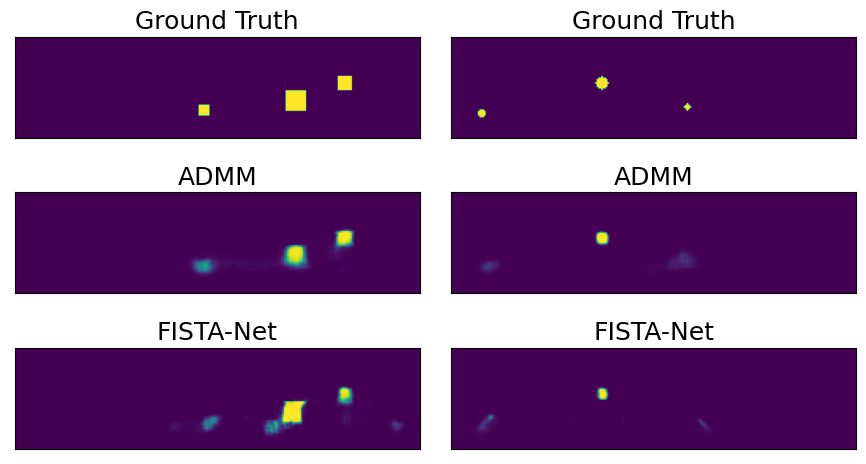

In [468]:
hyb_cmp_res_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\hybrid\\models\\cmp\\80k\\more_shapes_admm/2022-12-23_23-22-19.858192\\models\\best_model\\C\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\hybrid\\'
hyb_cmp_file = 'T_virt_abel'
fkmig_res_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\baselines\\'
fkmig_file = 'fkmig'
mask_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\masks\\test'
mask_file = 'V_true'

dirs = [
    mask_path,
    hyb_cmp_res_path + 'admm',
    hyb_cmp_res_path + 'fistanet'
]
files = [
    mask_file,
    hyb_cmp_file,
    hyb_cmp_file
]
names = [
    'Ground Truth',
    'ADMM',
    'FISTA-Net'
]
samples = [690, 147]
snr = 10
file_name = './plots/RECONSTR_comp_small_testdata-%d-%d_hybrid-cmp-moreshapes_fistanet-epoch-31.png' % (samples[0], samples[1])
plot_comp_small(dirs, files, names, samples, snr, file_name)


In [448]:
def plot_comp_title(dirs, files, names, sample, snrs, file_name):
    col_no = len(snrs)
    row_no = len(dirs)
    
    fig, axs = plt.subplots(row_no, col_no, layout="tight")
    params = {'ytick.labelcolor': 'white',
          'ytick.color': 'white'}
    pylab.rcParams.update(params)
    px = 1/plt.rcParams['figure.dpi']
    fig.set_figheight(500*px)
    fig.set_figwidth(900*px)
    
    for i in range(row_no):
        for j in range(col_no):
            if dirs[i].split('\\')[-1] in ['groundtruths', 'groundtruths_abel_space', 'test']:
                path =  dirs[i] + '/' + files[i] + '_' + str(sample) + '.png'
            else:
                path = dirs[i] + '/SNR_' + str(snrs[j]) + '/' + files[i] + '_' + str(sample) + '.png'
            image = io.imread(path)
            axs[i, j].imshow(image)
            
            axs[i, j].get_xaxis().set_visible(False)
            axs[i, j].get_yaxis().set_visible(False)
            axs[i, j].set_title(names[i], size='medium')
            
            
    fig.align_ylabels(axs[:, 0])
    plt.savefig(file_name)
    plt.show()
    plt.clf()
    plt.close()

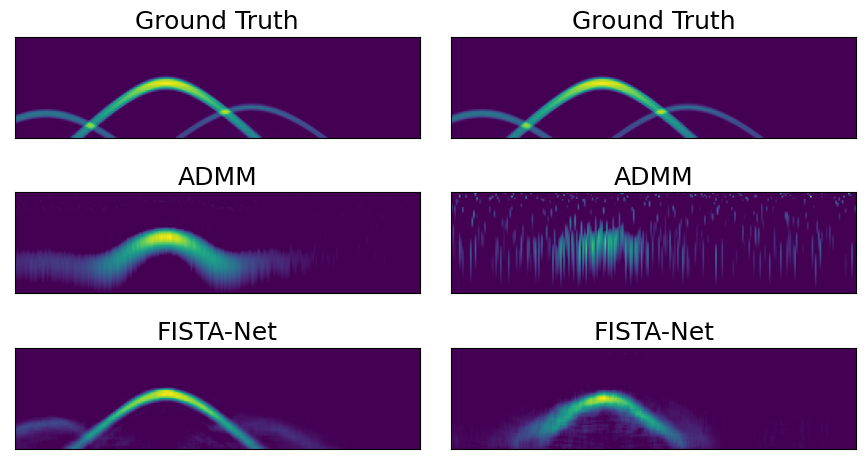

In [449]:
dirs = [
    '.\\data\\hybrid\\groundtruths_abel_space',
    '.\\data\\hybrid\\admm_abel_space',
    '.\\data\\hybrid\\fistanet_abel_space'
]
files = [
    'V_true',
    'T_virt_abel',
    'T_virt_abel'
]
names = [
    'Ground Truth',
    'ADMM',
    'FISTA-Net'
]
sample = 147
snrs = [20, -20]
file_name = './plots/VW_comp_small_testdata-%d_SNR-%d&%d_hybrid-cmp-onlysquare_fistanet-epoch-31.png' % (sample, snrs[0], snrs[1])
plot_comp_title(dirs, files, names, sample, snrs, file_name)

In [ ]:
def plot_comp(dirs, files, names, sample, snrs, file_name):
    col_no = len(snrs)
    row_no = len(dirs)
    
    fig, axs = plt.subplots(row_no, col_no, layout="tight")
    params = {'ytick.labelcolor': 'white',
          'ytick.color': 'white'}
    pylab.rcParams.update(params)
    px = 1/plt.rcParams['figure.dpi']
    fig.set_figheight(500*px)
    fig.set_figwidth(1600*px)
    
    for i in range(row_no):
        for j in range(col_no):
            if dirs[i].split('\\')[-1] in ['groundtruths', 'groundtruths_abel_space', 'test']:
                path =  dirs[i] + '/' + files[i] + '_' + str(sample) + '.png'
            else:
                path = dirs[i] + '/SNR_' + str(snrs[j]) + '/' + files[i] + '_' + str(sample) + '.png'
            image = io.imread(path)
            axs[i, j].imshow(image)
            
            axs[i, j].get_xaxis().set_visible(False)
            axs[i, j].get_yaxis().set_visible(False)
            if not i:
                axs[i, j].set_title('SNR ' + str(snrs[j]), size='small', y=1.0, pad=20)
            if not j:
                axs[i, j].get_yaxis().set_visible(True)
                axs[i, j].set_ylabel(names[i], rotation=360, size='small', ha='right', va='center')
            
            
    fig.align_ylabels(axs[:, 0])
    plt.savefig(file_name)
    plt.show()
    plt.clf()
    plt.close()

In [357]:
snrs = [70, 40, 0, -20]
samples = [125, 610, 120, 181]

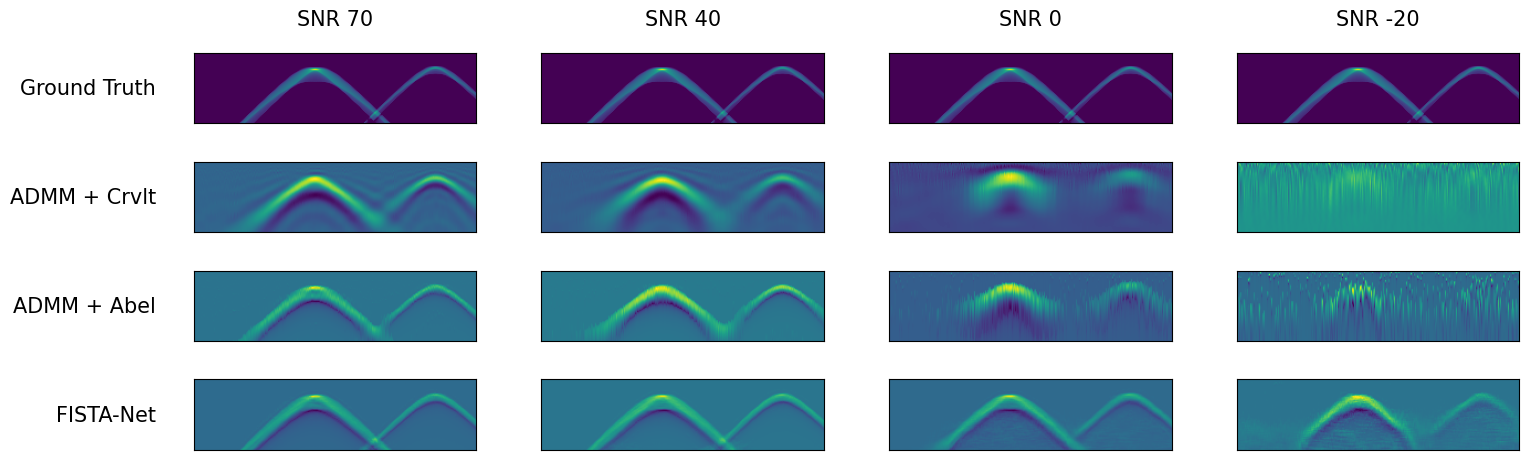

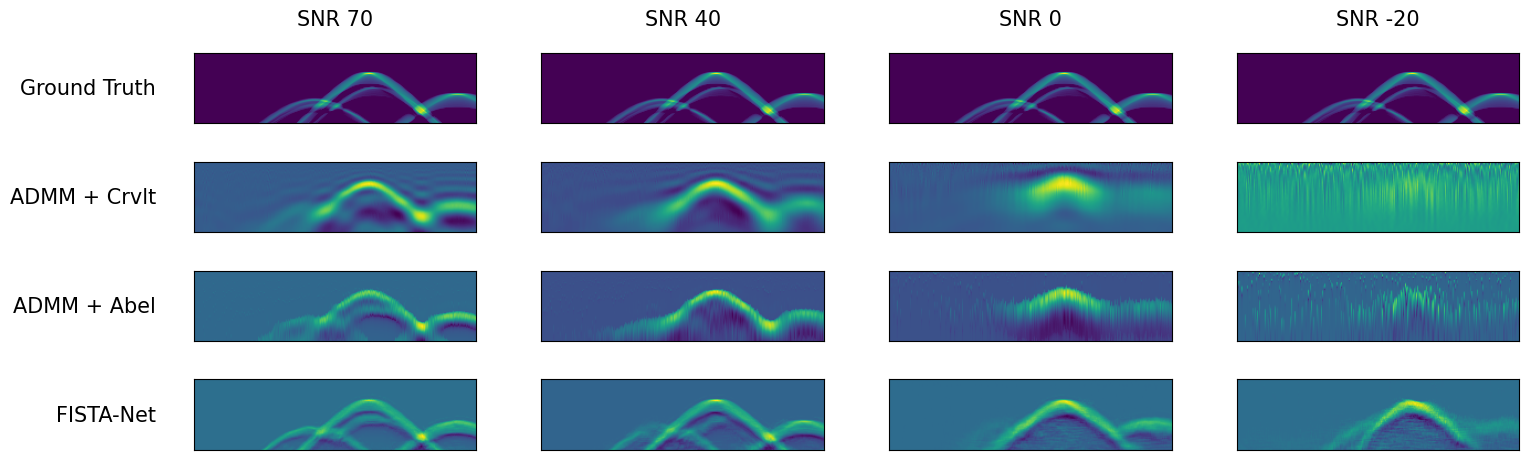

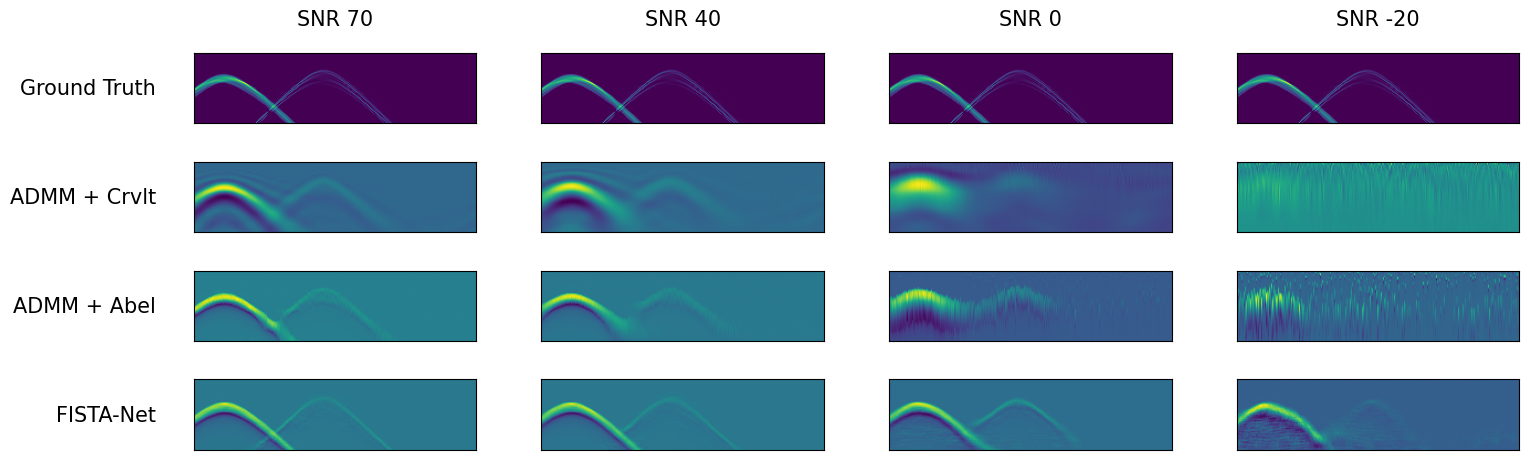

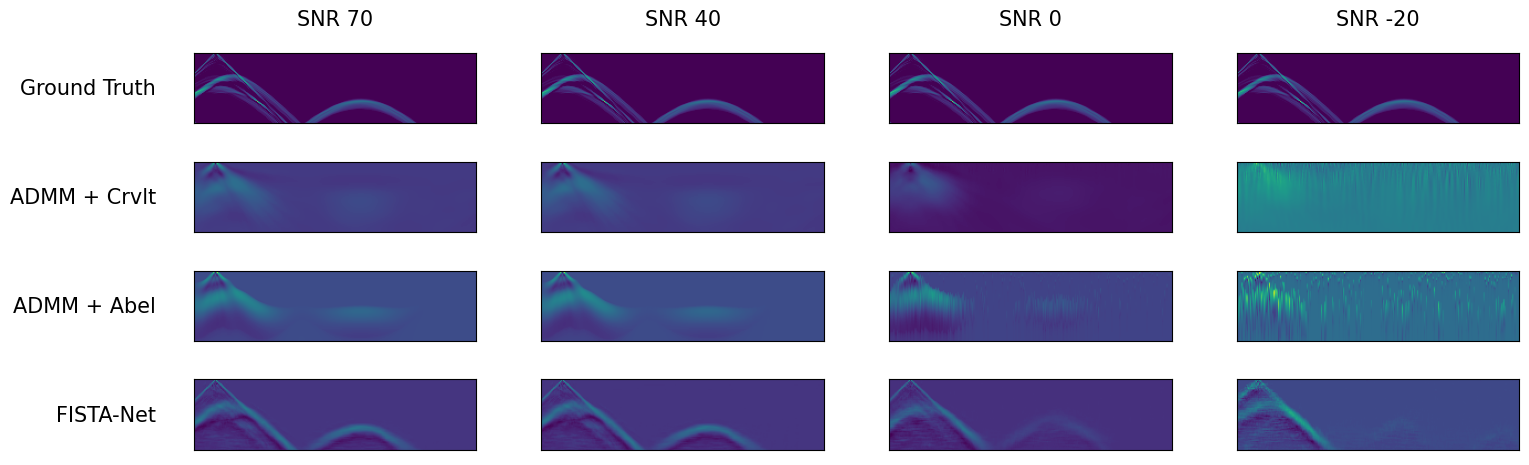

In [361]:
dirs = [
    '.\\data\\hybrid\\groundtruths',
    '.\\data\\hybrid\\admm_curvelet',
    '.\\data\\hybrid\\admm',
    '.\\data\\hybrid\\fistanet'
]
files = [
    'V_true',
    'T_virt_abel',
    'T_virt_abel',
    'T_virt_abel'
]
names = [
    'Ground Truth',
    'ADMM + Crvlt',
    'ADMM + Abel',
    'FISTA-Net'
]
for sample in samples:
    file_name = './plots/VW_comp_virt-space_testdata-%d_fistanet-epoch-31.png' % sample
    plot_comp(dirs, files, names, sample, snrs, file_name)

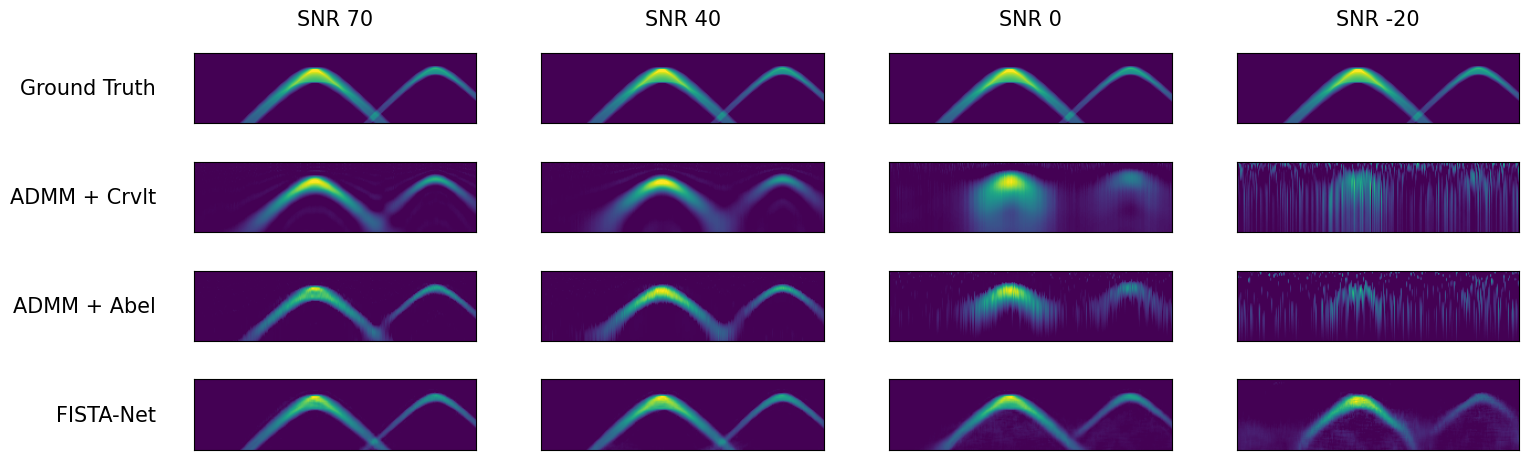

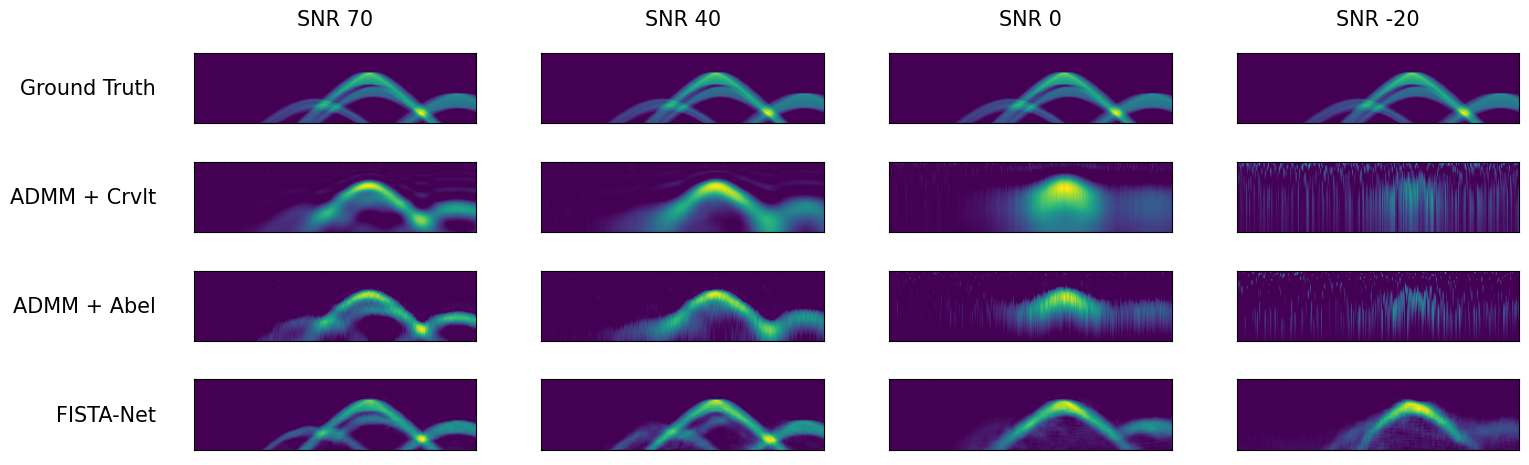

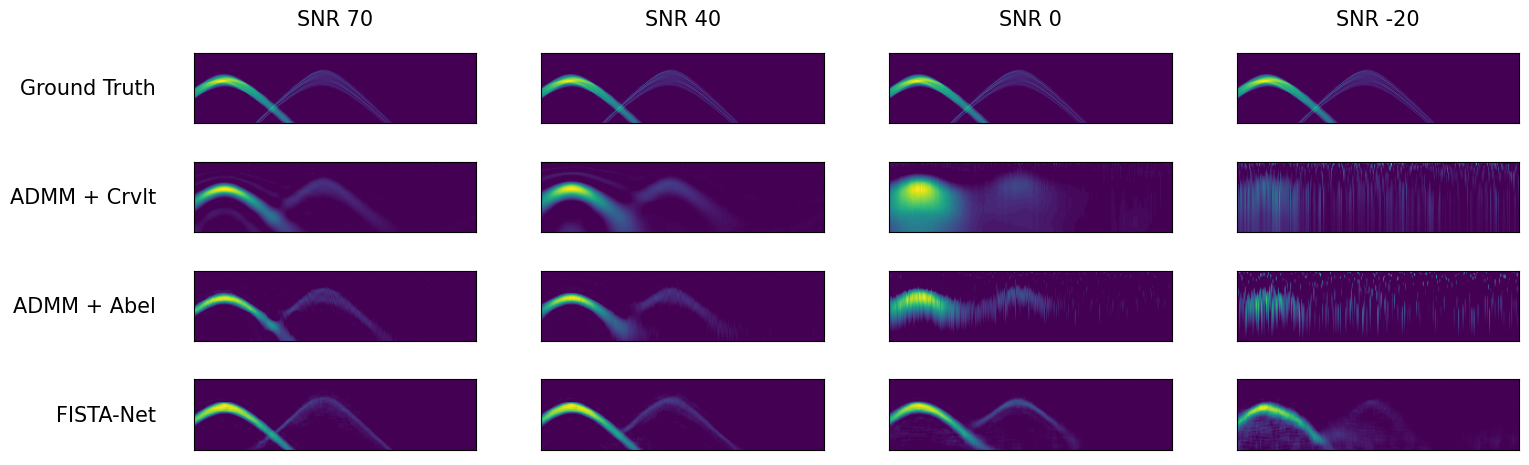

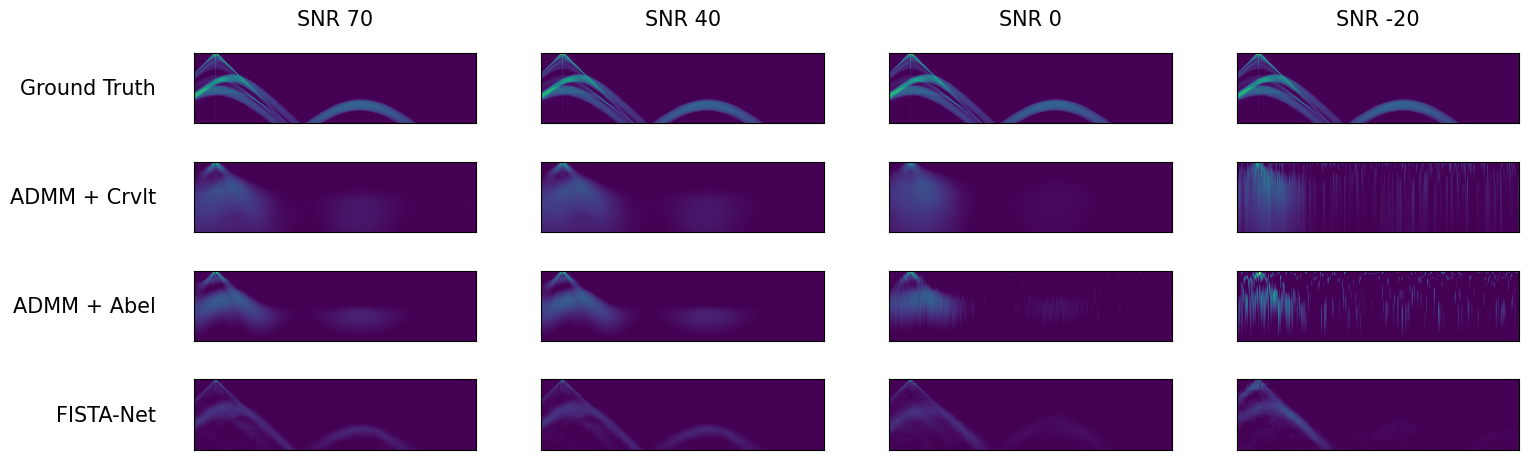

In [360]:
dirs = [
    '.\\data\\hybrid\\groundtruths_abel_space',
    '.\\data\\hybrid\\admm_curvelet_abel_space',
    '.\\data\\hybrid\\admm_abel_space',
    '.\\data\\hybrid\\fistanet_abel_space'
]
files = [
    'V_true',
    'T_virt_abel',
    'T_virt_abel',
    'T_virt_abel'
]
names = [
    'Ground Truth',
    'ADMM + Crvlt',
    'ADMM + Abel',
    'FISTA-Net'
]
for sample in samples:
    file_name = './plots/VW_comp_abel-space_testdata-%d_fistanet-epoch-31.png' % sample
    plot_comp(dirs, files, names, sample, snrs, file_name)

In [342]:
hyb_cmp_res_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\hybrid\\models\\cmp\\80k\\2020-4-25_13-32-31.889297\\models\\best_model\\C\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\hybrid\\'
hyb_cmp_file = 'T_virt_abel'
fkmig_res_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\baselines\\'
fkmig_file = 'fkmig'
mask_path = 'C:\\Users\\galiger.gergo\\Desktop\\ThermUNet-master\\data\\masks\\test'
mask_file = 'V_true'

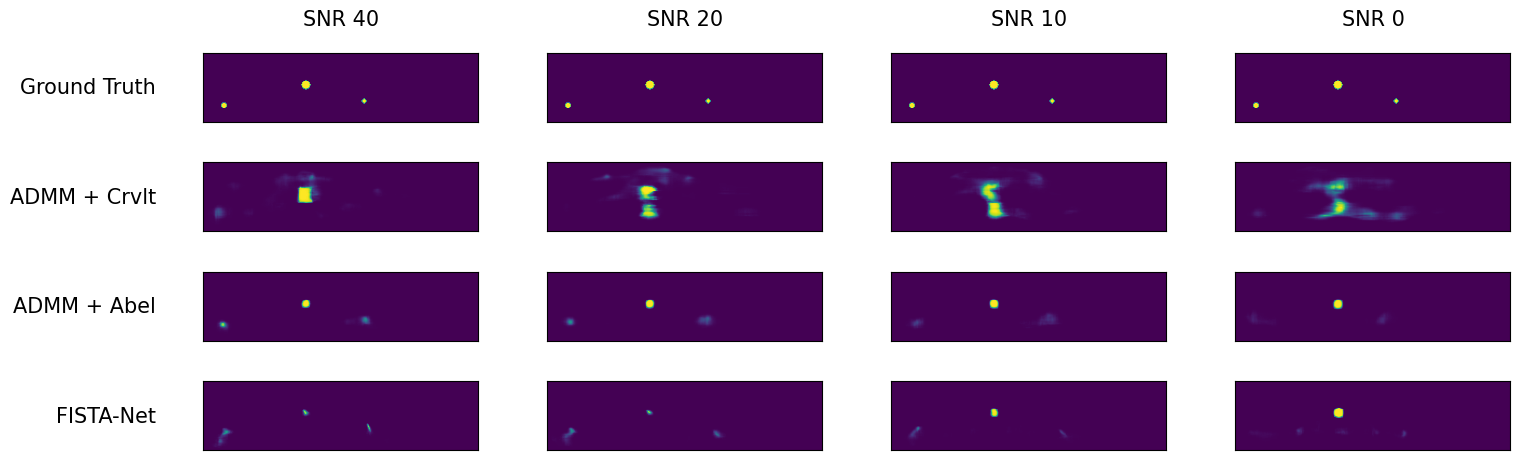

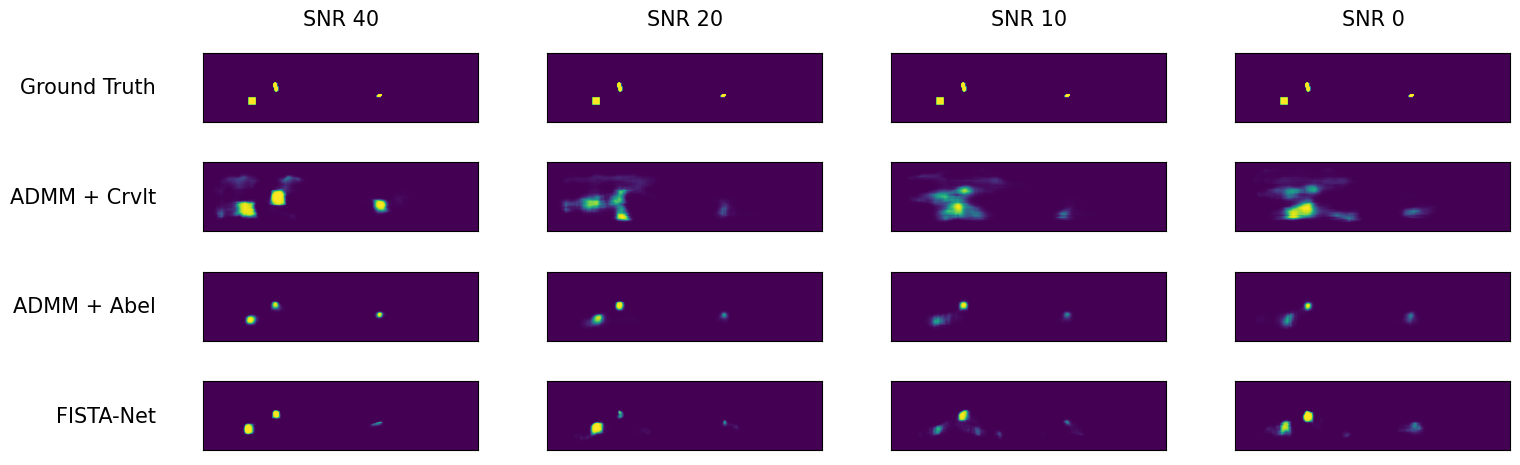

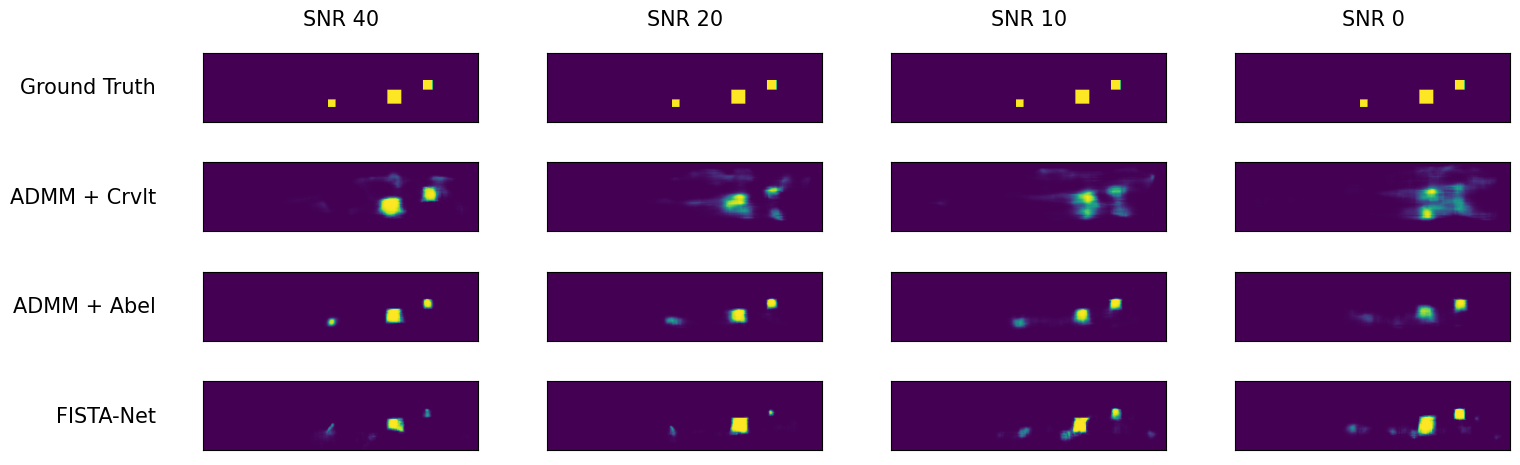

In [469]:
dirs = [
    mask_path,
    hyb_cmp_res_path + 'admm_curvelet',
    hyb_cmp_res_path + 'admm',
    hyb_cmp_res_path + 'fistanet'
]
files = [
    mask_file,
    hyb_cmp_file,
    hyb_cmp_file,
    hyb_cmp_file
]
names = [
    'Ground Truth',
    'ADMM + Crvlt',
    'ADMM + Abel',
    'FISTA-Net'
]
samples = [147, 225, 690]
snrs = [40, 20, 10, 0]
for sample in samples:
    file_name = './plots/RECONSTR_comp_testdata-%d_hybrid-cmp-moreshapes_fistanet-epoch-31.png' % sample
    plot_comp(dirs, files, names, sample, snrs, file_name)

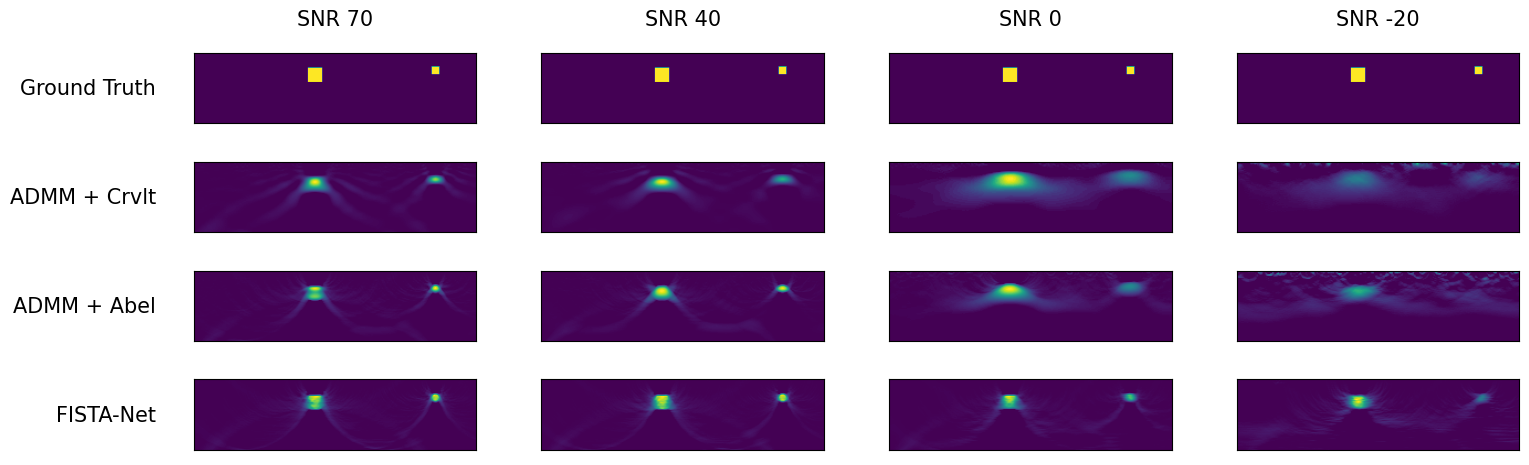

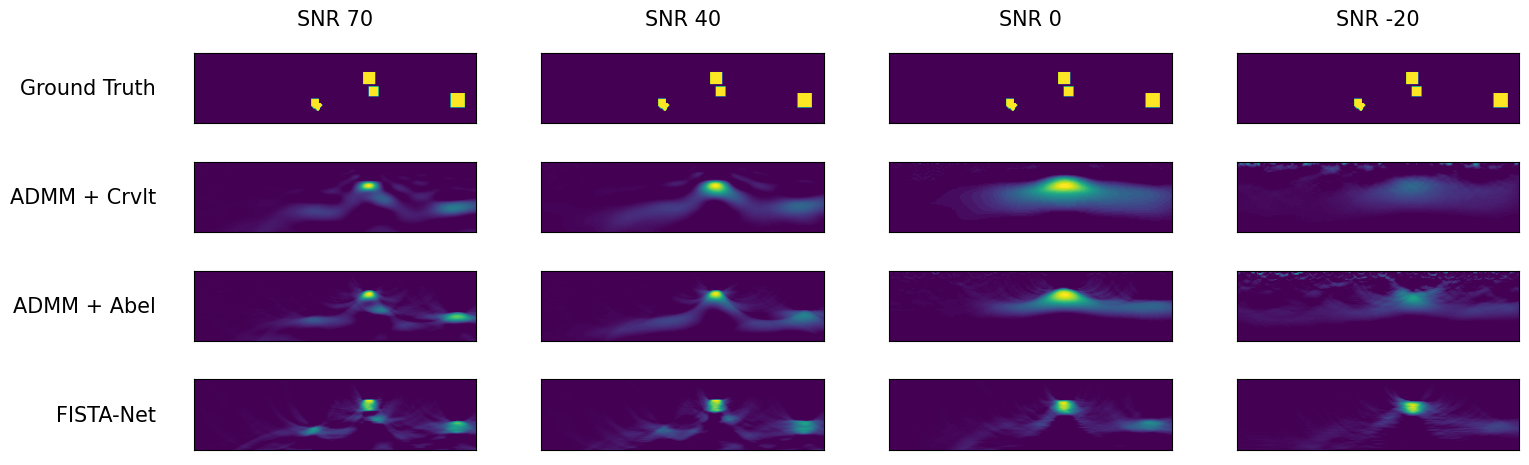

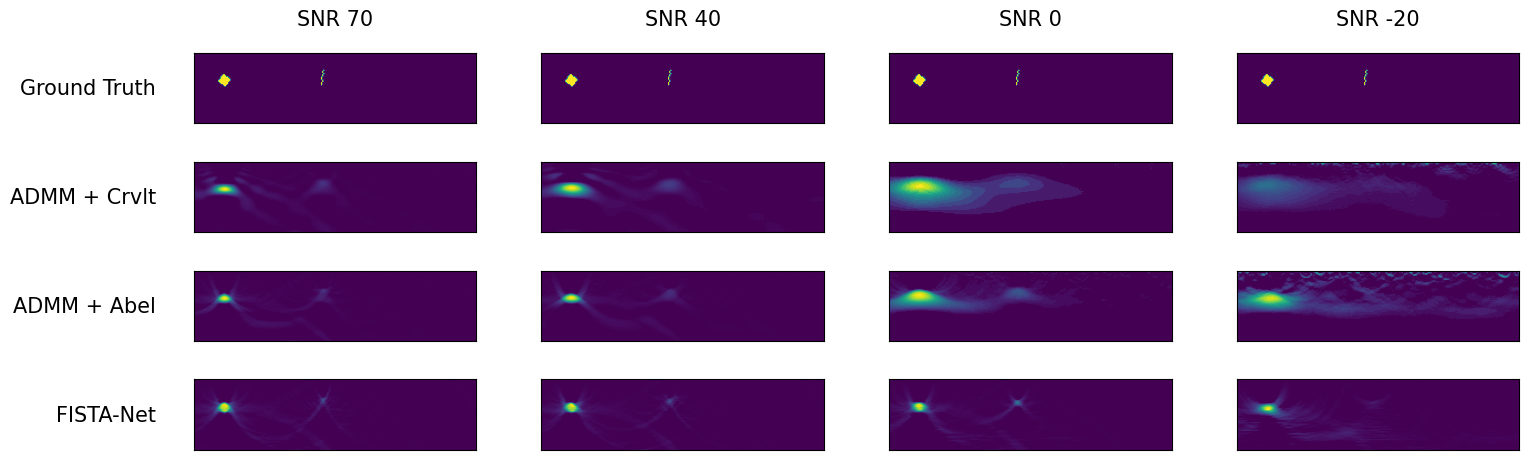

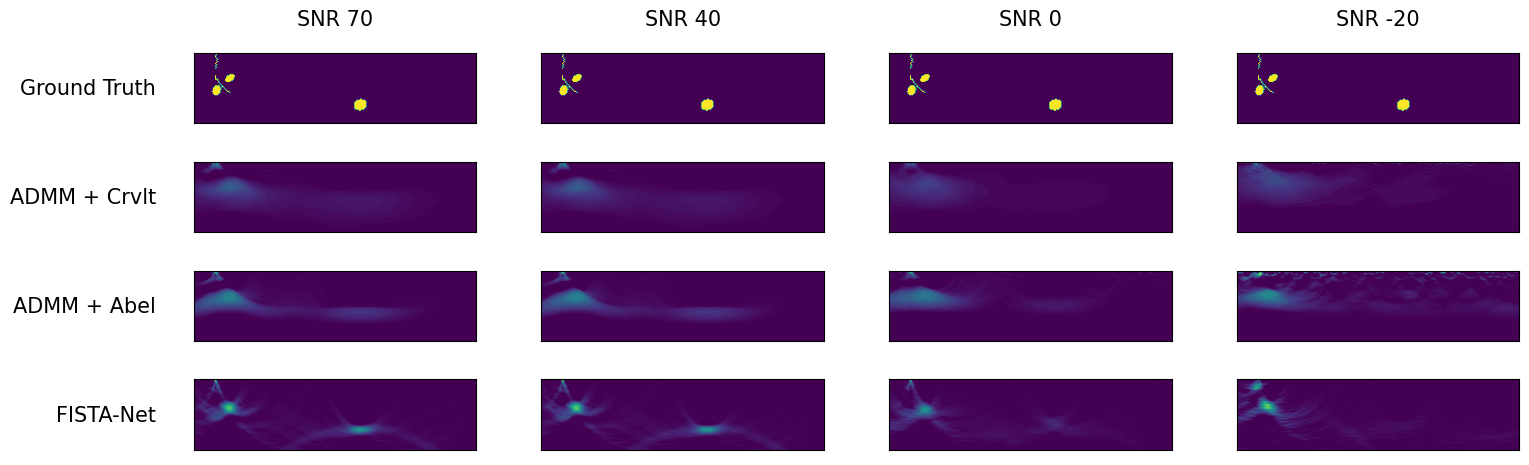

In [344]:
dirs = [
    mask_path,
    fkmig_res_path + 'admm_curvelet',
    fkmig_res_path + 'admm',
    fkmig_res_path + 'fistanet'
]
files = [
    mask_file,
    fkmig_file,
    fkmig_file,
    fkmig_file
]
names = [
    'Ground Truth',
    'ADMM + Crvlt',
    'ADMM + Abel',
    'FISTA-Net'
]
for sample in samples:
    file_name = './plots/RECONSTR_comp_testdata-%d_fkmig_fistanet-epoch-31.png' % sample
    plot_comp(dirs, files, names, sample, snrs, file_name)

In [345]:
def create_collage(samples, base_name):
    row_no = len(samples)

    abc = 'abcdefghijklmnopqrstuvwxyz'
    
    fig, axs = plt.subplots(row_no, 1, sharex = True)
    params = {'ytick.labelcolor': 'white',
          'ytick.color': 'white'}
    pylab.rcParams.update(params)
    px = 1/plt.rcParams['figure.dpi']
    fig.set_figheight(row_no*500*px)
    fig.set_figwidth(1600*px)
    
    for i in range(row_no):
        path = base_name[0] + str(samples[i]) + base_name[1]
        
        image = io.imread(path)
        axs[i].imshow(image)
        
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title('(' + abc[i] + ')', size='small', x=0.02, y=0.9)
    
    splt = base_name[0].split('/')
    pth = '/'.join(splt[:-1])
    bsname = splt[-1]
    file_name = pth + '/' + 'COLLAGE_' + bsname + 'I'
    for i in range(row_no):
        file_name += str(samples[i]) + 'I'
    file_name += base_name[1]
    plt.subplots_adjust(hspace=.0)
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()
    plt.clf()
    plt.close()


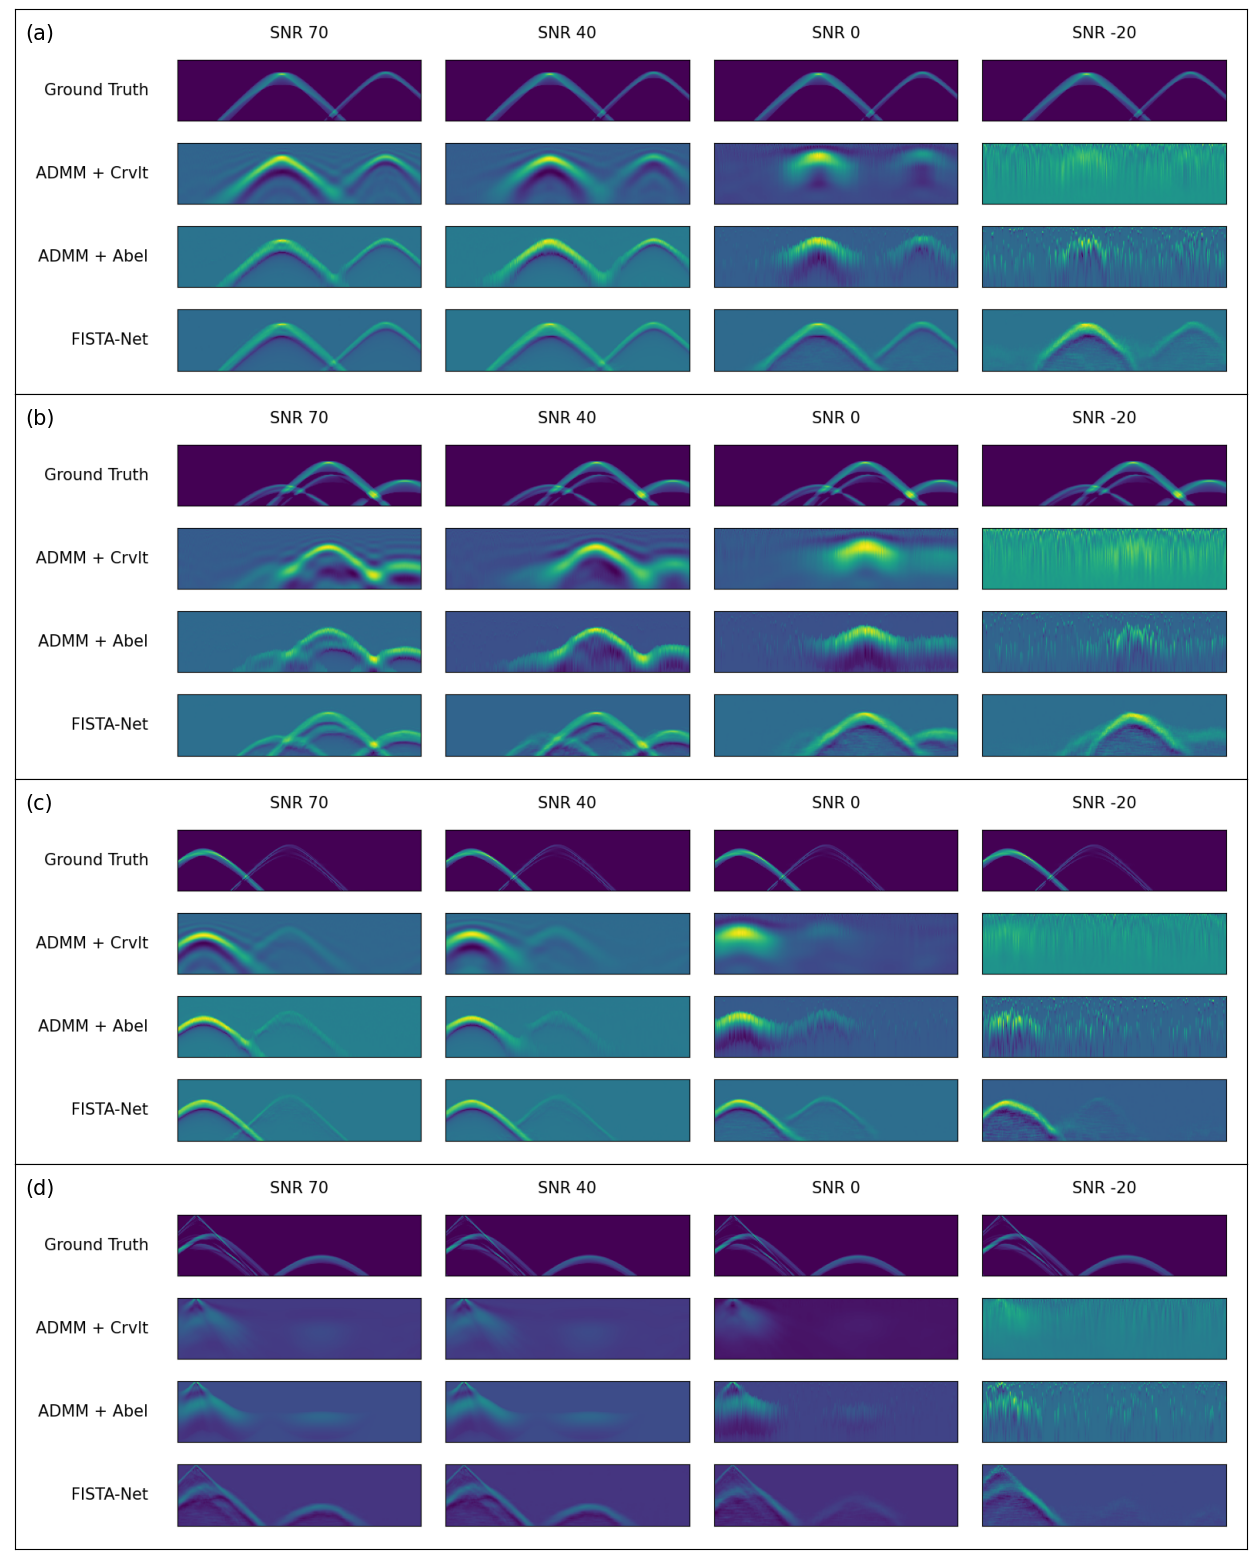

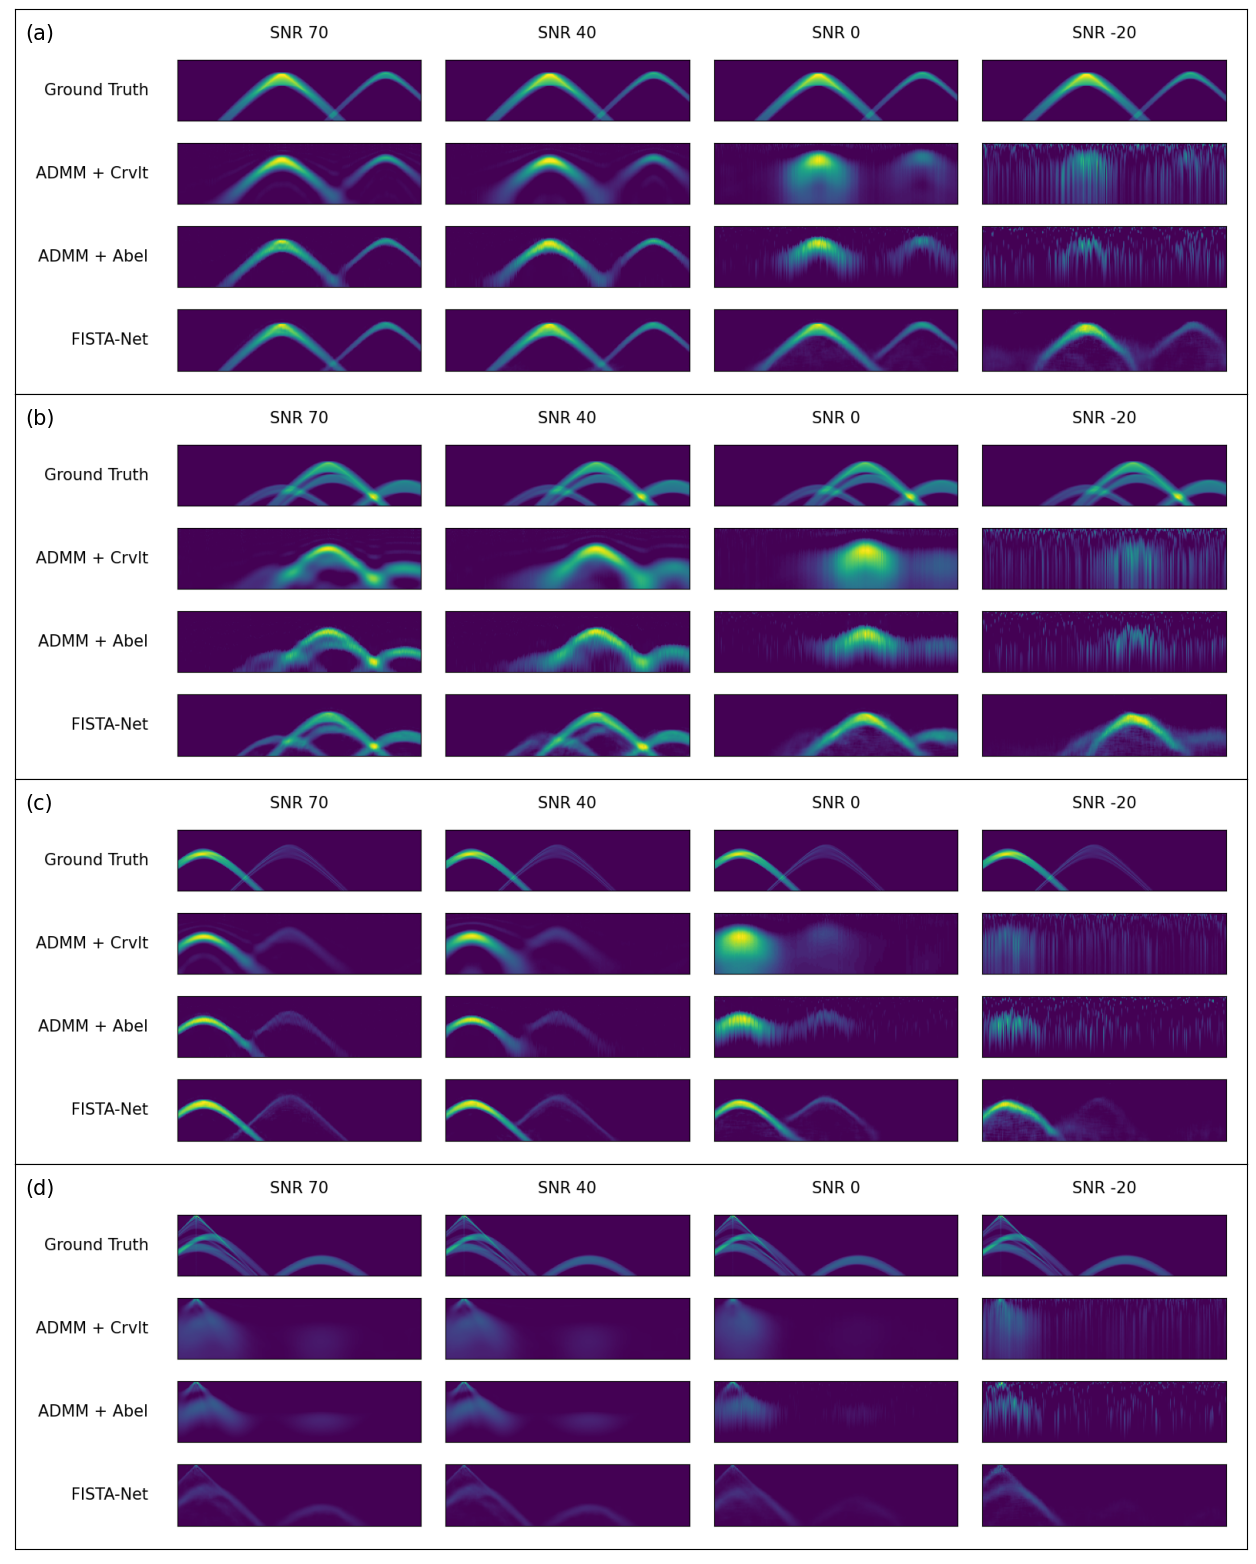

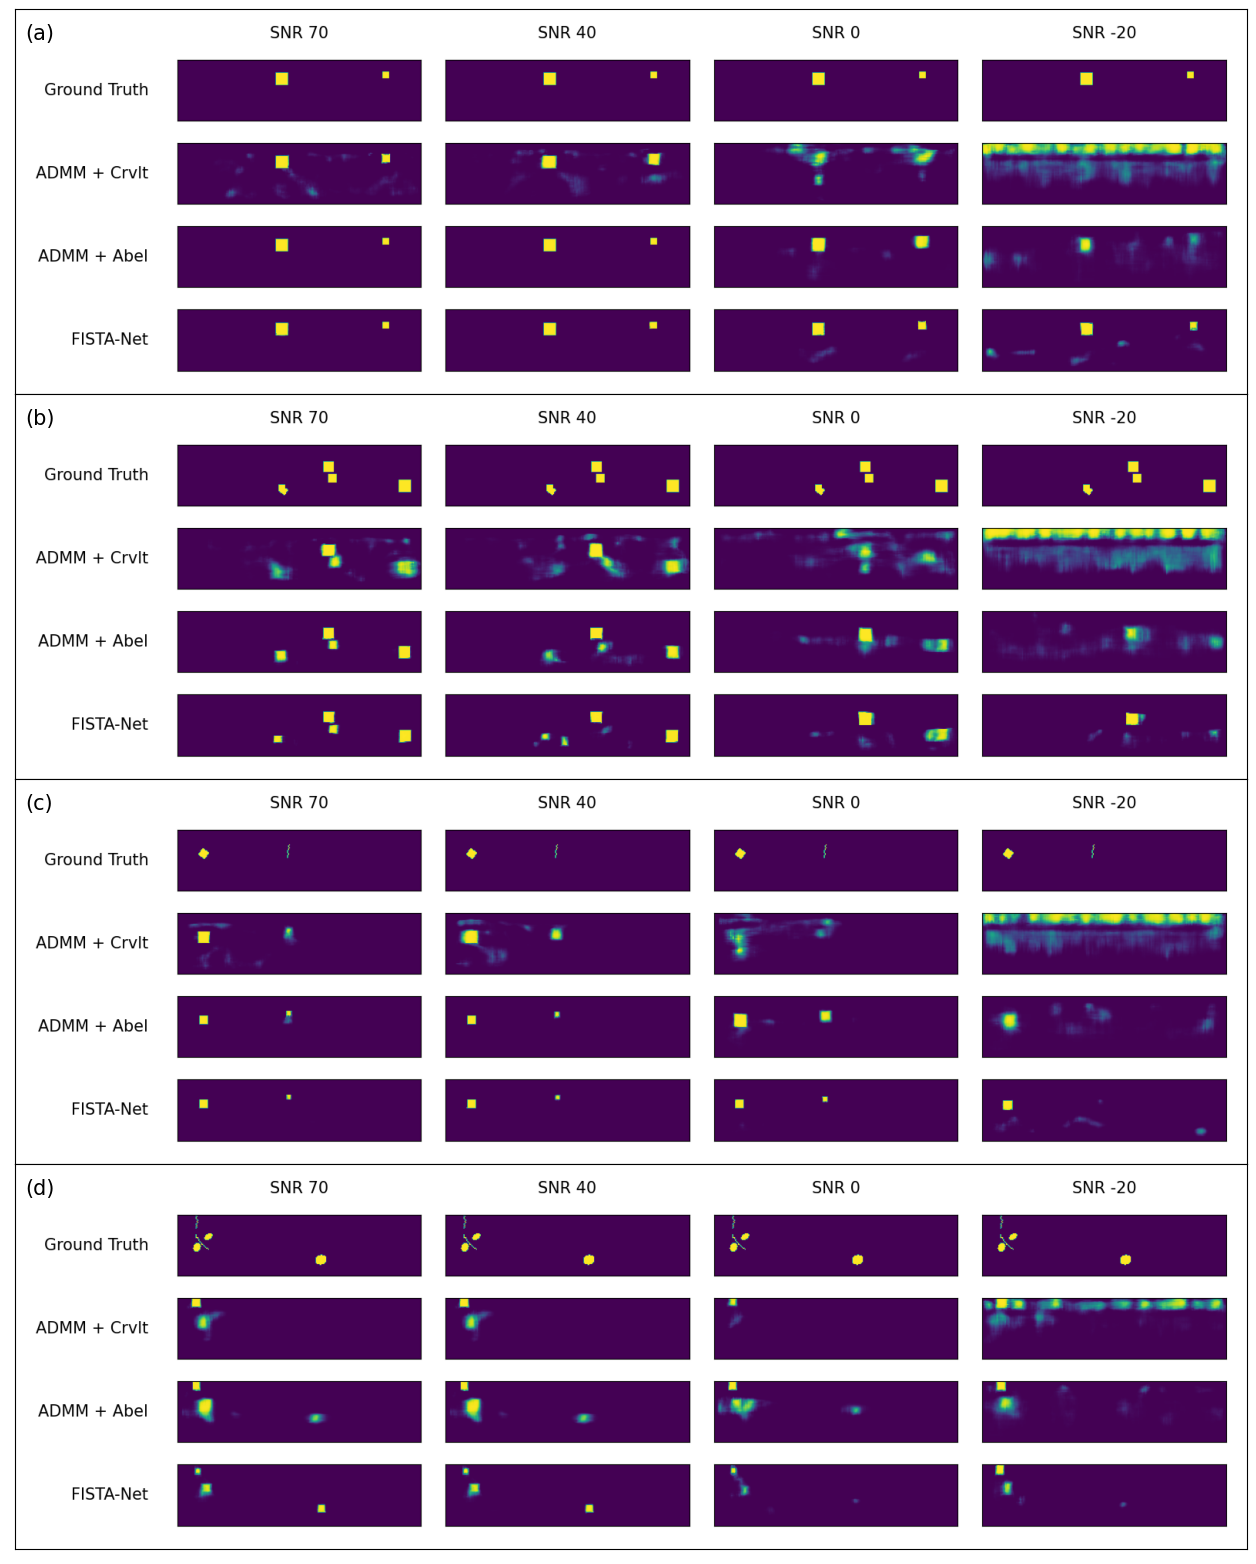

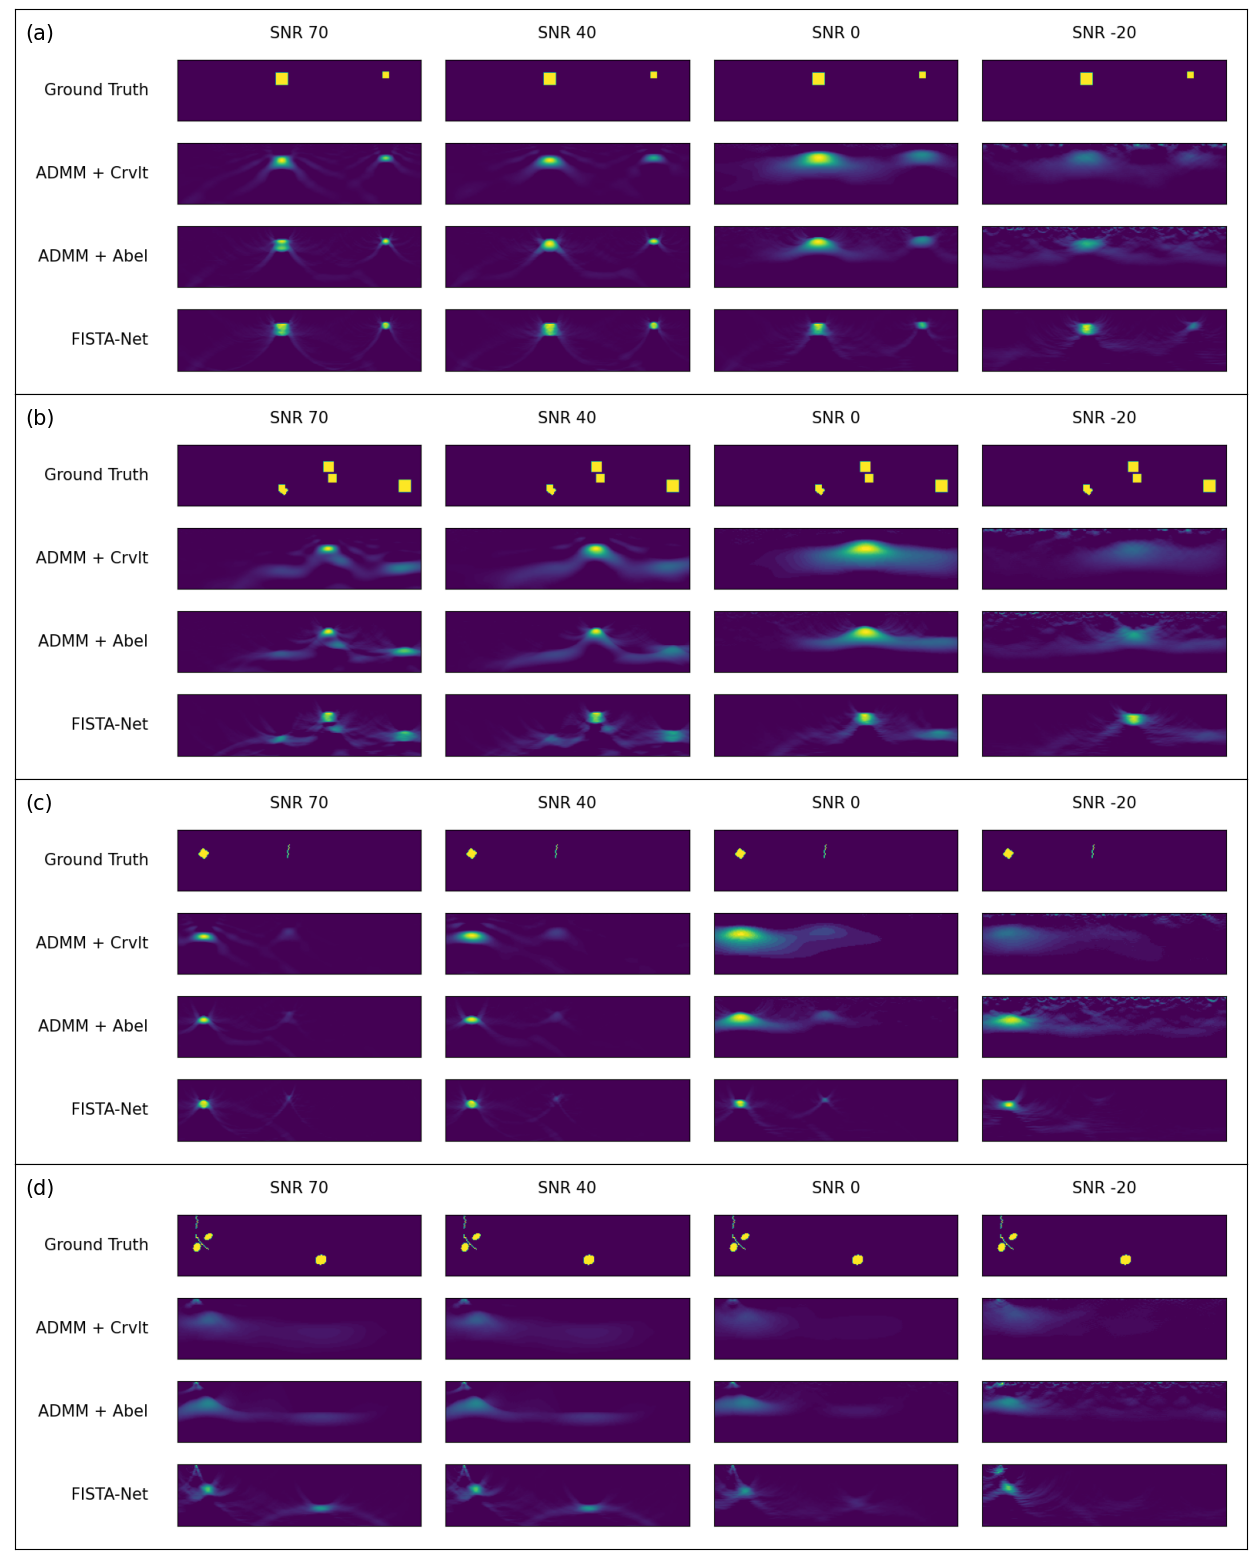

In [363]:
vw_virt_base_name = ['./plots/VW_comp_virt-space_testdata-', '_fistanet-epoch-31.png']
vw_abel_base_name = ['./plots/VW_comp_abel-space_testdata-', '_fistanet-epoch-31.png']
hyb_cmp_base_name = ['./plots/RECONSTR_comp_testdata-', '_hybrid-cmp-onlysquare_fistanet-epoch-31.png']
fkmig_base_name = ['./plots/RECONSTR_comp_testdata-', '_fkmig_fistanet-epoch-31.png']
base_names = [vw_virt_base_name, vw_abel_base_name, hyb_cmp_base_name, fkmig_base_name]
for base_name in base_names:
    create_collage(samples, base_name)